In [78]:
#coding=utf-8
import json
import geopandas
import matplotlib.pyplot as plt
import requests
import pandas as pd
import time
import os
import numpy as np
import matplotlib as mpl
import seaborn as sns
import json
import geopandas
import matplotlib.pyplot as plt
import requests
from shapely.geometry import LineString
import time
import os

In [79]:
filePath = '/Users/jackyanghc/Desktop/Jupyter/'
filename = []
for i,j,k in os.walk(filePath):
    for m in j:
        if m[0] == 'S':
            filename.append(m)

ShangHai = geopandas.read_file(filePath+filename[0],encoding='utf-8')
for i in range(1,len(filename)):
    tmp = geopandas.read_file(filePath+filename[i],encoding='utf-8')
    ShangHai = pd.concat([ShangHai,tmp])

print(ShangHai)

KeyboardInterrupt: 

In [57]:
ShangHai = ShangHai.drop_duplicates(
    subset = ['Lcode'],
    keep='first',
    inplace=False)
ShangHai = ShangHai.reset_index(drop=True)
ShangHai

,name,Timestamp,Lcode,speed,Congestion,lenght,geometry
0,申嘉湖高速,2019_11_22 12:02:00,"4054,4056,4061,4063,4604,4066,4069,4070,4072,4...",95,1,0.827757,"LINESTRING (120.99678 30.94682, 120.99790 30.9..."
1,申嘉湖高速,2019_11_22 12:02:00,"-4084,-4083,-4079,-4078,-4076,-4072,-4070,-406...",95,1,0.827588,"LINESTRING (121.79185 31.09912, 121.78603 31.0..."
2,上海绕城高速,2019_11_22 12:02:00,"2011,2010,2009,2008,2007,2006,2005,2392,2001,2...",74,1,0.815770,"LINESTRING (121.21579 30.88882, 121.21603 30.8..."
3,上海绕城高速,2019_11_22 12:02:00,"-1994,-1995,-1996,-1998,-2000,-2001,-2392,-200...",80,1,0.622420,"LINESTRING (121.29923 31.37005, 121.29452 31.3..."
4,３２４省道,2019_11_22 12:02:00,"4096,4098,4106,4107,4110,4116,4127,4128,4129,4...",45,1,0.784077,"LINESTRING (121.13834 30.93422, 121.14327 30.9..."
...,...,...,...,...,...,...,...
11635,龙华东路,2019_11_21 11:46:00,-5595,25,1,0.009922,"LINESTRING (121.49202 31.19752, 121.49154 31.1..."
11636,外环高速,2019_11_21 11:48:00,"-72,-70,-68,-67,-106,-105,-104,-103,-102,-101,...",65,1,0.352618,"LINESTRING (121.36338 31.30586, 121.36327 31.3..."
11637,三林路,2019_11_21 11:52:00,-4362,25,2,0.004240,"LINESTRING (121.52306 31.14653, 121.52281 31.1..."
11638,三林路,2019_11_21 11:52:00,-1615,35,1,0.008203,"LINESTRING (121.53095 31.14880, 121.52988 31.1..."


In [80]:
Roads = geopandas.GeoDataFrame()
all_Roads = geopandas.read_file("Information_Of_Road/",encoding='utf-8')


In [81]:
for i in range(len(all_Roads)):
    if len(all_Roads.loc[i]["Lcode"].split(',')) == 1:
        Roads = Roads.append(all_Roads.loc[i])
    else:
        continue

In [82]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,-1434,"LINESTRING (121.62517 31.24854, 121.62305 31.2...",0.009444,川桥路
1,-1433,"LINESTRING (121.61598 31.24638, 121.61567 31.2...",0.018483,川桥路
2,5892,"LINESTRING (121.18341 31.24684, 121.18413 31.2...",0.031206,纪白公路
3,5891,"LINESTRING (121.13939 31.24717, 121.13973 31.2...",0.044168,纪白公路
4,-2443,"LINESTRING (121.31937 31.16127, 121.31917 31.1...",0.035816,沪渝高速
...,...,...,...,...
4301,-6159,"LINESTRING (121.66649 31.21636, 121.66627 31.2...",0.013064,高科东路
4302,-1353,"LINESTRING (121.53978 31.16507, 121.53921 31.1...",0.008597,高青路
4303,-4667,"LINESTRING (121.47839 31.19514, 121.47788 31.1...",0.004168,龙华东路
4304,2074,"LINESTRING (121.23338 31.02077, 121.23389 31.0...",0.087180,沪昆高速


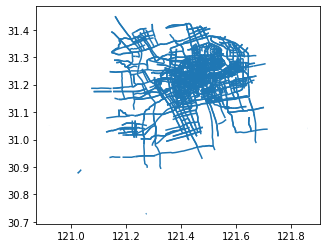

In [72]:
Roads.plot()

In [73]:
Lcodes = ShangHai['Lcode']
Code_list = []

for i in range(len(Lcodes)):
    s = Lcodes[i].split(',')
    for j in s:
        Code_list.append(j)
set_code = set(Code_list)
print(len(set_code))

6016


In [14]:
# 是否有相反的值
for i in set_code:
    for j in set_code:
        if int(i)+int(j)==0:
            print(i,j)
            print(Roads[Roads['Lcode'] == i],Roads[Roads['Lcode'] == j])

-2121 2121
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry  lenght   name
2848  2121  LINESTRING (121.29086 31.17233, 121.29215 31.1...  0.0414  沪青平公路
-1866 1866
      Lcode                                           geometry    lenght  name
3825  -1866  LINESTRING (121.28482 31.15216, 121.28397 31.1...  0.058676  沪渝高速 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2373 2373
      Lcode                                           geometry   lenght name
1327  -2373  LINESTRING (121.42251 31.20147, 121.42176 31.2...  0.00953  安顺路      Lcode                                           geometry    lenght name
3341  2373  LINESTRING (121.40734 31.20076, 121.40766 31.2...  0.006271  安顺路
-5533 5533
      Lcode                                           geometry    lenght name
3906  -5533  LINESTRING (121.40457 31.14569, 121.40485 31.1...  0.011396  古美路 Empty GeoDataFrame
Columns: [Lcode, geom

    Lcode                                           geometry    lenght name
366  1613  LINESTRING (121.49218 31.13485, 121.49246 31.1...  0.020493  三林路       Lcode                                           geometry    lenght name
2314  -1613  LINESTRING (121.51086 31.14304, 121.51076 31.1...  0.000109  三林路
3007 -3007
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3030  -3007  LINESTRING (121.47168 31.30643, 121.47156 31.3...  0.015389  凉城路
-2557 2557
      Lcode                                           geometry    lenght name
2665  -2557  LINESTRING (121.46649 31.41445, 121.46660 31.4...  0.015962  同济路      Lcode                                           geometry    lenght name
3334  2557  LINESTRING (121.47961 31.39664, 121.47948 31.3...  0.006702  同济路
2997 -2997
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght,

-1316 1316
      Lcode                                           geometry    lenght name
2014  -1316  LINESTRING (121.57169 31.23601, 121.57184 31.2...  0.004622  黑松路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2244 -2244
     Lcode                                           geometry    lenght  name
2053  2244  LINESTRING (121.64345 31.22831, 121.64349 31.2...  0.026675  唐陆公路       Lcode                                           geometry    lenght  name
2839  -2244  LINESTRING (121.62569 31.25489, 121.62592 31.2...  0.006579  唐陆公路
-4492 4492
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5518 -5518
     Lcode                                           geometry    lenght  name
2793  5518  LINESTRING (121.30645 31.01388, 121.31032 31.0...  0.062028  北松公路       Lcode                                           geometry    lenght  name
2605  -5518  LINESTRING (121.38580 31.032

4698 -4698
     Lcode                                           geometry    lenght name
3470  4698  LINESTRING (121.57658 31.25315, 121.57500 31.2...  0.004183  枣庄路       Lcode                                           geometry    lenght name
1703  -4698  LINESTRING (121.57009 31.25995, 121.57019 31.2...  0.005304  枣庄路
-4239 4239
      Lcode                                           geometry    lenght  name
2767  -4239  LINESTRING (121.55849 31.35214, 121.55870 31.3...  0.008859  浦东北路      Lcode                                           geometry    lenght  name
1663  4239  LINESTRING (121.57128 31.33331, 121.57063 31.3...  0.013959  浦东北路
-1227 1227
      Lcode                                           geometry    lenght name
1316  -1227  LINESTRING (121.56533 31.22795, 121.56487 31.2...  0.003761  迎春路      Lcode                                           geometry    lenght name
1313  1227  LINESTRING (121.55899 31.22528, 121.55916 31.2...  0.003237  迎春路
-2032 2032
      Lcode           

-4718 4718
      Lcode                                           geometry    lenght name
3391  -4718  LINESTRING (121.52276 31.34024, 121.52251 31.3...  0.009476  国帆路      Lcode                                           geometry    lenght name
4072  4718  LINESTRING (121.50662 31.34307, 121.50782 31.3...  0.007376  国帆路
-1944 1944
      Lcode                                           geometry    lenght name
2999  -1944  LINESTRING (121.36901 31.20833, 121.36910 31.2...  0.018856  剑河路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
6181 -6181
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
2723  -6181  LINESTRING (121.55496 31.12458, 121.55655 31.1...  0.012281  康梧路
-1298 1298
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1549  1298  LINESTRING (121.58587 31.22700, 121

      Lcode                                           geometry    lenght name
2763  -3296  LINESTRING (121.54323 31.28664, 121.54338 31.2...  0.006489  内江路      Lcode                                           geometry    lenght name
2744  3296  LINESTRING (121.54863 31.27820, 121.54841 31.2...  0.003888  内江路
-3418 3418
      Lcode                                           geometry    lenght name
3548  -3418  LINESTRING (121.37975 31.20771, 121.37843 31.2...  0.002069  仙霞路      Lcode                                           geometry    lenght name
2037  3418  LINESTRING (121.37148 31.20812, 121.37202 31.2...  0.006217  仙霞路
4985 -4985
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
2597  -4985  LINESTRING (121.37717 31.27162, 121.37605 31.2...  0.067231  真南路
241 -241
     Lcode                                           geometry    lenght  name
2174   241  LINESTRING (121.49419 31.20450, 1

4440 -4440
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3645  -4440  LINESTRING (121.56169 31.21316, 121.56197 31.2...  0.002475  芳甸路
2426 -2426
     Lcode                                           geometry    lenght name
1187  2426  LINESTRING (121.47858 31.26140, 121.47839 31.2...  0.003186  华昌路      Lcode                                           geometry   lenght name
879  -2426  LINESTRING (121.47472 31.26470, 121.47618 31.2...  0.00193  华昌路
4685 -4685
     Lcode                                           geometry    lenght name
3525  4685  LINESTRING (121.32436 31.21070, 121.32436 31.2...  0.005991  申昆路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-660 660
     Lcode                                           geometry    lenght name
3381  -660  LINESTRING (121.43418 31.21087, 121.43406 31.2...  0.009542  华山路      Lcode                                      

-5100 5100
      Lcode                                           geometry    lenght  \
3824  -5100  LINESTRING (121.62429 31.31754, 121.62455 31.3...  0.012477   

       name  
3824  富特东三路   Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3195 -3195
     Lcode                                           geometry    lenght name
1070  3195  LINESTRING (121.53799 31.32822, 121.53947 31.3...  0.007842  殷行路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-213 213
     Lcode                                           geometry    lenght  name
3328  -213  LINESTRING (121.45892 31.23796, 121.45946 31.2...  0.002668  石门二路     Lcode                                           geometry    lenght  name
735   213  LINESTRING (121.46132 31.23293, 121.46089 31.2...  0.002929  石门二路
6103 -6103
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5671 -5671
Empty GeoDataFrame
Col

     Lcode                                           geometry    lenght  name
1913  1908  LINESTRING (121.43767 31.32934, 121.44113 31.3...  0.004424  长江西路      Lcode                                           geometry    lenght  name
743  -1908  LINESTRING (121.44688 31.33357, 121.44574 31.3...  0.005979  长江西路
745 -745
     Lcode                                           geometry    lenght name
2636   745  LINESTRING (121.42931 31.15727, 121.42976 31.1...  0.007773  沪闵路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-5789 5789
     Lcode                                           geometry    lenght  name
891  -5789  LINESTRING (121.29351 31.42084, 121.29436 31.4...  0.024718  浏翔公路      Lcode                                           geometry    lenght  name
4126  5789  LINESTRING (121.30384 31.37216, 121.30351 31.3...  0.025529  浏翔公路
-2068 2068
     Lcode                                           geometry    lenght  name
861  -2068  LINESTRING (121.49033 31.24072,

-1369 1369
      Lcode                                           geometry    lenght name
1615  -1369  LINESTRING (121.59583 31.27248, 121.59432 31.2...  0.008977  五莲路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2493 2493
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght name
952  2493  LINESTRING (121.50898 31.22426, 121.50957 31.2...  0.002094  张杨路
1991 -1991
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-3012 3012
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3511 -3511
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght  name
73  -3511  LINESTRING (121.40461 31.21405, 121.40441 31.2...  0.005243

1408 -1408
     Lcode                                           geometry    lenght  name
2922  1408  LINESTRING (121.60439 31.28009, 121.60439 31.2...  0.011404  杨高北路       Lcode                                           geometry    lenght  name
3986  -1408  LINESTRING (121.60422 31.29878, 121.60423 31.2...  0.007374  杨高北路
2306 -2306
     Lcode                                           geometry    lenght name
2028  2306  LINESTRING (121.39088 31.26892, 121.39089 31.2...  0.000078  交通路       Lcode                                           geometry    lenght name
1690  -2306  LINESTRING (121.40947 31.26216, 121.40914 31.2...  0.021576  交通路
-4066 4066
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4011 4011
      Lcode                                           geometry    lenght name
1266  -4011  LINESTRING (121.42942 31.29936, 121.42944 31.2...  0.010552  原平路      Lcode                          

-1664 1664
      Lcode                                           geometry    lenght name
2557  -1664  LINESTRING (121.53194 31.32479, 121.53195 31.3...  0.003212  中原路      Lcode                                           geometry    lenght name
2871  1664  LINESTRING (121.53205 31.31817, 121.53205 31.3...  0.003408  中原路
4827 -4827
     Lcode                                           geometry    lenght name
1933  4827  LINESTRING (121.50978 31.17673, 121.50983 31.1...  0.009051  东明路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1985 1985
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-6227 6227
      Lcode                                           geometry    lenght  name
3929  -6227  LINESTRING (121.23499 31.04234, 121.23497 31.0...  0.013943  谷阳北路      Lcode                                           geometry   lenght  name
2544  6227  LINESTRING (121.23508 31.02430, 121

-240 240
     Lcode                                           geometry    lenght  name
3982  -240  LINESTRING (121.50311 31.22226, 121.50329 31.2...  0.009087  中山南路      Lcode                                           geometry    lenght  name
3160   240  LINESTRING (121.50151 31.20945, 121.50163 31.2...  0.007114  中山南路
2037 -2037
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1575 1575
      Lcode                                           geometry    lenght  name
1285  -1575  LINESTRING (121.50333 31.20668, 121.50224 31.2...  0.004364  陆家浜路      Lcode                                           geometry    lenght  name
2473  1575  LINESTRING (121.49989 31.21115, 121.49998 31.2...  0.002394  陆家浜路
-2753 2753
      Lcode                                           geometry    lenght  name
2248  -2753  LINESTRING (121.48197 31.33632, 121.48231 31.3...  0.010866  长江南路 Empty GeoDataFrame
Columns: [Lcode

Index: []       Lcode                                           geometry    lenght  name
2566  -5990  LINESTRING (121.26526 31.09236, 121.26297 31.0...  0.036048  沈砖公路
5530 -5530
     Lcode                                           geometry    lenght  name
1349  5530  LINESTRING (121.43111 31.24755, 121.43115 31.2...  0.003072  凯旋北路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2097 2097
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1325 1325
      Lcode                                           geometry    lenght name
3432  -1325  LINESTRING (121.59783 31.24319, 121.59750 31.2...  0.004628  明月路      Lcode                                           geometry    lenght name
1423  1325  LINESTRING (121.58202 31.23436, 121.58301 31.2...  0.013879  明月路
-6076 6076
    Lcode                                           geometry    lenght name
39  -6076  LINESTRING (121.36306 31.

2845  6200  LINESTRING (121.26402 30.98193, 121.26421 30.9...  0.020637  松卫北路       Lcode                                           geometry    lenght  name
2574  -6200  LINESTRING (121.26202 31.01746, 121.26217 31.0...  0.015815  松卫北路
5983 -5983
     Lcode                                           geometry    lenght  name
1141  5983  LINESTRING (121.34335 31.40540, 121.34373 31.4...  0.000448  月罗公路       Lcode                                           geometry    lenght  name
1467  -5983  LINESTRING (121.41821 31.41981, 121.41627 31.4...  0.077845  月罗公路
-5946 5946
      Lcode                                           geometry    lenght name
1487  -5946  LINESTRING (121.62483 31.21564, 121.62080 31.2...  0.014288  丹桂路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2753 -2753
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
2248  -2753  LINESTRING (121.48197 31.3363

1143 -1143
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry   lenght  name
2821  -1143  LINESTRING (121.50632 31.24039, 121.50620 31.2...  0.00518  银城中路
4079 -4079
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-3683 3683
     Lcode                                           geometry    lenght name
913  -3683  LINESTRING (121.43438 31.24504, 121.43465 31.2...  0.006294  西康路      Lcode                                           geometry    lenght name
2515  3683  LINESTRING (121.44466 31.23612, 121.44460 31.2...  0.007932  西康路
-786 786
   Lcode                                           geometry    lenght  name
87  -786  LINESTRING (121.38850 31.23139, 121.38683 31.2...  0.008578  金沙江路      Lcode                                           geometry    lenght  name
1666   786  LINESTRING (121.37412 31.23433, 121.37438 

3118  松江人民北路   Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-113 113
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
516 -516
     Lcode                                           geometry    lenght name
1540   516  LINESTRING (121.44587 31.19107, 121.44704 31.1...  0.001456  斜土路      Lcode                                           geometry    lenght name
1238  -516  LINESTRING (121.45241 31.19448, 121.45223 31.1...  0.005926  斜土路
-3531 3531
      Lcode                                           geometry    lenght  name
1015  -3531  LINESTRING (121.39618 31.23188, 121.39587 31.2...  0.007702  金沙江路      Lcode                                           geometry    lenght  name
1641  3531  LINESTRING (121.38052 31.23240, 121.38174 31.2...  0.008298  金沙江路
875 -875
     Lcode                                           geometry    lenght  name
2161   875  LINESTRING (121.48756 31.

Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1919  5833  LINESTRING (121.23119 31.04233, 121.23505 31.0...  0.019725  文翔路
-6160 6160
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4461 4461
      Lcode                                           geometry    lenght  name
3655  -4461  LINESTRING (121.64378 31.22794, 121.64394 31.2...  0.019748  唐陆公路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
12 -12
    Lcode                                           geometry    lenght   name
725    12  LINESTRING (121.49725 31.20690, 121.49667 31.2...  0.026537  内环高架路     Lcode                                           geometry    lenght   name
139   -12  LINESTRING (121.43835 31.17850, 121.43911 31.1...  0.050385  内环高架路
-2167 2167
      Lcode                                           ge

     Lcode                                           geometry   lenght name
1701  1126  LINESTRING (121.55493 31.20944, 121.55486 31.2...  0.00253  白杨路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
926 -926
    Lcode                                           geometry   lenght   name
767   926  LINESTRING (121.50880 31.23674, 121.50893 31.2...  0.00231  陆家嘴东路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4395 -4395
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4660 4660
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-5764 5764
      Lcode                                           geometry    lenght name
1825  -5764  LINESTRING (121.43018 31.03000, 121.42539 31.0...  0.026199  剑川路      Lcode                                           geometry    lenght name

     Lcode                                           geometry    lenght name
1144   704  LINESTRING (121.41309 31.24523, 121.41348 31.2...  0.007363  武宁路     Lcode                                           geometry    lenght name
278  -704  LINESTRING (121.42982 31.23363, 121.42953 31.2...  0.013231  武宁路
699 -699
     Lcode                                           geometry    lenght  name
1179   699  LINESTRING (121.43263 31.23154, 121.43250 31.2...  0.003547  武宁南路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1426 -1426
     Lcode                                           geometry    lenght  name
3323  1426  LINESTRING (121.59454 31.24658, 121.59487 31.2...  0.019897  新金桥路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1950 -1950
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
2503  -1950  LINESTRING (121.50297 31.30807, 121.50274 31.3... 

-1835 1835
      Lcode                                           geometry    lenght name
1700  -1835  LINESTRING (121.53197 31.31818, 121.53165 31.3...  0.019024  国和路      Lcode                                           geometry    lenght name
1006  1835  LINESTRING (121.51934 31.30471, 121.51936 31.3...  0.004927  国和路
1059 -1059
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
2355  -1059  LINESTRING (121.45250 31.04747, 121.45595 31.0...  0.022657  虹梅南路
-30 30
     Lcode                                           geometry    lenght   name
3427   -30  LINESTRING (121.52535 31.27849, 121.52528 31.2...  0.011517  内环高架路      Lcode                                           geometry    lenght   name
3691    30  LINESTRING (121.48887 31.28572, 121.48978 31.2...  0.034054  内环高架路
-2432 2432
      Lcode                                           geometry   lenght name
2788  -2432  LINESTRING (121.

444  -2911  LINESTRING (121.51730 31.23251, 121.51733 31.2...  0.004855  南泉北路     Lcode                                           geometry    lenght  name
376  2911  LINESTRING (121.52023 31.22389, 121.52013 31.2...  0.004558  南泉北路
-537 537
     Lcode                                           geometry    lenght  name
3088  -537  LINESTRING (121.53844 31.22242, 121.53835 31.2...  0.003511  世纪大道      Lcode                                           geometry    lenght  name
2675   537  LINESTRING (121.53031 31.22679, 121.53072 31.2...  0.005753  世纪大道
-4937 4937
      Lcode                                           geometry    lenght name
3502  -4937  LINESTRING (121.46023 31.18869, 121.46133 31.1...  0.002418  枫林路      Lcode                                           geometry    lenght name
2068  4937  LINESTRING (121.46320 31.18444, 121.46275 31.1...  0.002857  枫林路
1431 -1431
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry,

     Lcode                                           geometry    lenght  name
2794  5516  LINESTRING (121.25236 31.00195, 121.25257 31.0...  0.058833  北松公路       Lcode                                           geometry    lenght  name
2585  -5516  LINESTRING (121.36263 31.02751, 121.36139 31.0...  0.062011  北松公路
-4741 4741
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght name
639  4741  LINESTRING (121.55154 31.24216, 121.55190 31.2...  0.008125  博山路
1057 -1057
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
2354  -1057  LINESTRING (121.44659 31.06296, 121.44898 31.0...  0.016577  虹梅南路
-353 353
     Lcode                                           geometry    lenght  name
1570  -353  LINESTRING (121.45094 31.21339, 121.45084 31.2...  0.001718  淮海中路      Lcode                                       

1140 -1140
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
1770  -1140  LINESTRING (121.50420 31.23248, 121.50421 31.2...  0.002113  银城中路
-2214 2214
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
1071  2214  LINESTRING (121.54249 31.29643, 121.54268 31.2...  0.003876  松花江路
207 -207
     Lcode                                           geometry   lenght name
2307   207  LINESTRING (121.45367 31.24593, 121.45348 31.2...  0.00189  恒丰路      Lcode                                           geometry    lenght name
1308  -207  LINESTRING (121.45129 31.25128, 121.45122 31.2...  0.004198  恒丰路
-2054 2054
      Lcode                                           geometry    lenght  name
1073  -2054  LINESTRING (121.15915 31.44893, 121.17015 31.4...  0.054916  沈海高速   Lcode                                 

Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1498  3358  LINESTRING (121.39188 31.21390, 121.39193 31.2...  0.004675  水城路
5935 -5935
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
1511  -5935  LINESTRING (121.25064 31.38970, 121.25093 31.3...  0.007778  博乐路
-1751 1751
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1743 -1743
     Lcode                                           geometry    lenght  name
2445  1743  LINESTRING (121.47977 31.26957, 121.47950 31.2...  0.005825  东江湾路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3006 -3006
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    leng

-693 693
    Lcode                                           geometry    lenght name
131  -693  LINESTRING (121.44514 31.22262, 121.44524 31.2...  0.001899  华山路     Lcode                                           geometry    lenght name
144   693  LINESTRING (121.44384 31.21709, 121.44402 31.2...  0.005896  华山路
-1399 1399
     Lcode                                           geometry    lenght name
673  -1399  LINESTRING (121.57217 31.35341, 121.57169 31.3...  0.013823  港城路      Lcode                                           geometry    lenght name
2208  1399  LINESTRING (121.53808 31.35392, 121.53870 31.3...  0.020818  港城路
-4626 4626
    Lcode                                           geometry    lenght  name
80  -4626  LINESTRING (121.39944 31.19188, 121.40115 31.1...  0.008841  古北南路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
6036 -6036
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                         

-6123 6123
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3841 -3841
     Lcode                                           geometry  lenght name
1419  3841  LINESTRING (121.51631 31.26746, 121.51610 31.2...  0.0029  许昌路       Lcode                                           geometry    lenght name
1880  -3841  LINESTRING (121.51216 31.27364, 121.51227 31.2...  0.004839  许昌路
-1413 1413
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3250 -3250
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry   lenght name
3643  -3250  LINESTRING (121.41346 31.19641, 121.41063 31.1...  0.00355  虹桥路
168 -168
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: 

1539 -1539
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3690  -1539  LINESTRING (121.41860 31.16680, 121.41897 31.1...  0.008661  桂林路
-276 276
     Lcode                                           geometry    lenght name
3019  -276  LINESTRING (121.43070 31.16825, 121.42932 31.1...  0.005724  漕宝路      Lcode                                           geometry    lenght name
3619   276  LINESTRING (121.41870 31.16682, 121.41901 31.1...  0.006384  漕宝路
-106 106
    Lcode                                           geometry    lenght  name
971  -106  LINESTRING (121.35931 31.17689, 121.35972 31.1...  0.011815  外环高速     Lcode                                           geometry    lenght  name
792   106  LINESTRING (121.36564 31.16139, 121.36553 31.1...  0.011759  外环高速
4048 -4048
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, le

1339  -2883  LINESTRING (121.52836 31.23084, 121.52926 31.2...  0.004501  福山路     Lcode                                           geometry    lenght name
370  2883  LINESTRING (121.53236 31.22196, 121.53137 31.2...  0.005517  福山路
3796 -3796
     Lcode                                           geometry    lenght name
1127  3796  LINESTRING (121.48164 31.23140, 121.48141 31.2...  0.000842  湖北路       Lcode                                           geometry    lenght name
2148  -3796  LINESTRING (121.48093 31.23332, 121.48103 31.2...  0.001249  湖北路
-3550 3550
      Lcode                                           geometry    lenght name
1907  -3550  LINESTRING (121.40878 31.24569, 121.40851 31.2...  0.006515  武宁路      Lcode                                           geometry    lenght name
1328  3550  LINESTRING (121.39693 31.24480, 121.39744 31.2...  0.005432  武宁路
6153 -6153
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                    

Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3880 -3880
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-572 572
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2783 -2783
     Lcode                                           geometry    lenght  name
3482  2783  LINESTRING (121.57333 31.25573, 121.57409 31.2...  0.005334  博山东路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
955 -955
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4543 4543
      Lcode                                           geometry   lenght  name
3923  -4543  LINESTRING (121.56319 31.25638, 121.56345 31.2...  0.00586  居家桥路      Lcode                                           geometry    le

-3978 3978
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry   lenght name
1049  3978  LINESTRING (121.45248 31.19444, 121.45247 31.1...  0.00573  东安路
-5947 5947
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
962 -962
     Lcode                                           geometry    lenght  name
2331   962  LINESTRING (121.62409 31.20028, 121.62482 31.2...  0.001164  高科中路      Lcode                                           geometry    lenght  name
3098  -962  LINESTRING (121.63461 31.20329, 121.63452 31.2...  0.010101  高科中路
5065 -5065
     Lcode                                           geometry    lenght name
2129  5065  LINESTRING (121.31326 31.20437, 121.31344 31.2...  0.000176  润虹路       Lcode                                           geometry    lenght name
2259  -5065  LINESTRING (121.31888 31.20499, 121.317

-331 331
     Lcode                                           geometry    lenght  name
1610  -331  LINESTRING (121.48491 31.21921, 121.48464 31.2...  0.002071  复兴东路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1874 -1874
     Lcode                                           geometry    lenght name
3285  1874  LINESTRING (121.38174 31.31916, 121.38247 31.3...  0.025785  锦秋路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1222 -1222
     Lcode                                           geometry    lenght name
1682  1222  LINESTRING (121.55826 31.22797, 121.55853 31.2...  0.010817  丁香路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-679 679
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
3140   679  LINESTRING (121.40452 31.18461, 121.40535 31.1...  0.009345  吴中路
-4399 4399
Empty GeoDataFrame
Columns: [Lcode, geometry, lengh

1570 -1570
    Lcode                                           geometry    lenght name
914  1570  LINESTRING (121.44271 31.28287, 121.44423 31.2...  0.009206  灵石路       Lcode                                           geometry    lenght name
2532  -1570  LINESTRING (121.45739 31.28330, 121.45682 31.2...  0.005754  灵石路
213 -213
    Lcode                                           geometry    lenght  name
735   213  LINESTRING (121.46132 31.23293, 121.46089 31.2...  0.002929  石门二路      Lcode                                           geometry    lenght  name
3328  -213  LINESTRING (121.45892 31.23796, 121.45946 31.2...  0.002668  石门二路
4378 -4378
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2092 -2092
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3894 -3894
     Lcode                                       

     Lcode                                           geometry    lenght name
3793   279  LINESTRING (121.40290 31.16226, 121.40398 31.1...  0.002466  漕宝路      Lcode                                           geometry    lenght name
2434  -279  LINESTRING (121.41212 31.16438, 121.41132 31.1...  0.007034  漕宝路
-241 241
     Lcode                                           geometry    lenght  name
3981  -241  LINESTRING (121.50649 31.21404, 121.50651 31.2...  0.007063  中山南路      Lcode                                           geometry    lenght  name
2174   241  LINESTRING (121.49419 31.20450, 121.49461 31.2...  0.008927  中山南路
-2864 2864
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
3821  2864  LINESTRING (121.41416 31.13677, 121.41433 31.1...  0.008607  梅陇路
4443 -4443
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, n

1156  -3778  LINESTRING (121.47541 31.24578, 121.47543 31.2...  0.00279  浙江北路
-1904 1904
      Lcode                                           geometry    lenght name
3142  -1904  LINESTRING (121.37771 31.21973, 121.37695 31.2...  0.010605  北翟路      Lcode                                           geometry    lenght name
1568  1904  LINESTRING (121.36140 31.22381, 121.36220 31.2...  0.007815  北翟路
85 -85
     Lcode                                           geometry    lenght  name
3520    85  LINESTRING (121.55907 31.36537, 121.55991 31.3...  0.011338  外环高速      Lcode                                           geometry    lenght  name
1008   -85  LINESTRING (121.61075 31.34072, 121.61024 31.3...  0.046354  外环高速
3773 -3773
     Lcode                                           geometry    lenght name
2700  3773  LINESTRING (121.50850 31.26275, 121.50832 31.2...  0.002321  大连路       Lcode                                           geometry    lenght name
3242  -3773  LINESTRING (121.50628 31.2

     Lcode                                           geometry    lenght name
1486   143  LINESTRING (121.49271 31.29353, 121.49347 31.2...  0.032882  中环路      Lcode                                           geometry   lenght name
3072  -143  LINESTRING (121.54055 31.30735, 121.53977 31.3...  0.02274  中环路
-2888 2888
      Lcode                                           geometry    lenght name
3450  -2888  LINESTRING (121.40402 31.15834, 121.40398 31.1...  0.008666  东兰路      Lcode                                           geometry    lenght name
2983  2888  LINESTRING (121.37925 31.15219, 121.37962 31.1...  0.017049  东兰路
3467 -3467
     Lcode                                           geometry    lenght name
2521  3467  LINESTRING (121.39082 31.20584, 121.39173 31.2...  0.009304  仙霞路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-363 363
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]

-5834 5834
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1923  5834  LINESTRING (121.25033 31.04122, 121.25054 31.0...  0.008209  文翔路
-4603 4603
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
2514  4603  LINESTRING (121.45794 31.17051, 121.45925 31.1...  0.004882  丰谷路
3995 -3995
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
2517  -3995  LINESTRING (121.44114 31.30060, 121.44103 31.2...  0.009786  万荣路
-2325 2325
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1254 -1254
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometr

     Lcode                                           geometry    lenght   name
1817    41  LINESTRING (121.46295 31.24709, 121.46310 31.2...  0.017421  南北高架路      Lcode                                           geometry    lenght   name
1024   -41  LINESTRING (121.45209 31.27922, 121.45213 31.2...  0.024031  南北高架路
-77 77
    Lcode                                           geometry    lenght  name
745   -77  LINESTRING (121.44110 31.35766, 121.43996 31.3...  0.011391  外环高速      Lcode                                           geometry  lenght  name
1044    77  LINESTRING (121.39777 31.34643, 121.39902 31.3...  0.0411  外环高速
4032 -4032
     Lcode                                           geometry    lenght name
1416  4032  LINESTRING (121.43201 31.27687, 121.43075 31.2...  0.012949  高平路       Lcode                                           geometry    lenght name
1219  -4032  LINESTRING (121.42759 31.29838, 121.42763 31.2...  0.009804  高平路
-4595 4595
Empty GeoDataFrame
Columns: [Lcode, geo

943  3674  LINESTRING (121.37330 31.23079, 121.37362 31.2...  0.003717  真光路
-1051 1051
      Lcode                                           geometry    lenght name
4101  -1051  LINESTRING (121.50038 31.17181, 121.49762 31.1...  0.004403  成山路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2239 2239
      Lcode                                           geometry    lenght  name
2196  -2239  LINESTRING (121.58901 31.35226, 121.58919 31.3...  0.015861  富特北路      Lcode                                           geometry    lenght  name
1551  2239  LINESTRING (121.60311 31.33310, 121.60299 31.3...  0.008093  富特北路
6124 -6124
     Lcode                                           geometry    lenght name
3494  6124  LINESTRING (121.60332 31.24356, 121.60323 31.2...  0.008175  金沪路       Lcode                                           geometry    lenght name
2781  -6124  LINESTRING (121.60950 31.25712, 121.60828 31.2...  0.007708  金沪路
-1151 1151
Empty GeoDataFrame
Columns: [L

-780 780
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
2099   780  LINESTRING (121.41714 31.23262, 121.41743 31.2...  0.004561  宁夏路
5088 -5088
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
780  -5088  LINESTRING (121.59803 31.33943, 121.59301 31.3...  0.005658  华申路
-705 705
     Lcode                                           geometry    lenght name
1841  -705  LINESTRING (121.41316 31.24540, 121.41289 31.2...  0.004403  武宁路      Lcode                                           geometry    lenght name
1964   705  LINESTRING (121.40236 31.24461, 121.40274 31.2...  0.006641  武宁路
-2782 2782
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
3840  2782  LINESTRING (121.56668 31.25164, 121.56747 31

3152 -3152
     Lcode                                           geometry    lenght name
2938  3152  LINESTRING (121.50265 31.17916, 121.50420 31.1...  0.007544  齐河路       Lcode                                           geometry    lenght name
2428  -3152  LINESTRING (121.52231 31.18416, 121.52224 31.1...  0.013347  齐河路
5128 -5128
    Lcode                                           geometry    lenght name
270  5128  LINESTRING (121.45568 31.24703, 121.45612 31.2...  0.001876  秣陵路       Lcode                                           geometry    lenght name
1119  -5128  LINESTRING (121.46019 31.24762, 121.45983 31.2...  0.003071  秣陵路
-1969 1969
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1311  1969  LINESTRING (121.48236 31.34668, 121.48281 31.3...  0.015249  长江路
-4997 4997
      Lcode                                           geometry    lenght name
1573  -4997  LINESTRING (121.45033 3

2205  -5670  LINESTRING (121.23473 31.39360, 121.23424 31.3...  0.015413  胜竹路
3531 -3531
     Lcode                                           geometry    lenght  name
1641  3531  LINESTRING (121.38052 31.23240, 121.38174 31.2...  0.008298  金沙江路       Lcode                                           geometry    lenght  name
1015  -3531  LINESTRING (121.39618 31.23188, 121.39587 31.2...  0.007702  金沙江路
-1422 1422
      Lcode                                           geometry    lenght name
1757  -1422  LINESTRING (121.59930 31.26941, 121.59949 31.2...  0.005971  东陆路     Lcode                                           geometry    lenght name
884  1422  LINESTRING (121.60809 31.26472, 121.60743 31.2...  0.004332  东陆路
4718 -4718
     Lcode                                           geometry    lenght name
4072  4718  LINESTRING (121.50662 31.34307, 121.50782 31.3...  0.007376  国帆路       Lcode                                           geometry    lenght name
3391  -4718  LINESTRING (121.52276 

     Lcode                                           geometry    lenght  name
3216  2820  LINESTRING (121.42581 31.12069, 121.42569 31.1...  0.009952  虹梅南路       Lcode                                           geometry    lenght  name
3940  -2820  LINESTRING (121.41840 31.13157, 121.41879 31.1...  0.003161  虹梅南路
2911 -2911
    Lcode                                           geometry    lenght  name
376  2911  LINESTRING (121.52023 31.22389, 121.52013 31.2...  0.004558  南泉北路      Lcode                                           geometry    lenght  name
444  -2911  LINESTRING (121.51730 31.23251, 121.51733 31.2...  0.004855  南泉北路
1742 -1742
     Lcode                                           geometry    lenght  name
3849  1742  LINESTRING (121.48008 31.26578, 121.48018 31.2...  0.003847  东江湾路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
11 -11
    Lcode                                           geometry    lenght   name
378    11  LINESTRING (121.50126 31.20699, 

3079  6070  LINESTRING (121.54820 31.14439, 121.54813 31.1...  0.015554  锦绣路       Lcode                                           geometry    lenght name
2330  -6070  LINESTRING (121.54549 31.16913, 121.54566 31.1...  0.009922  锦绣路
-4254 4254
      Lcode                                           geometry    lenght name
4118  -4254  LINESTRING (121.50103 31.14862, 121.50034 31.1...  0.017454  中环路      Lcode                                           geometry    lenght name
4056  4254  LINESTRING (121.47272 31.14558, 121.47351 31.1...  0.018666  中环路
-2472 2472
      Lcode                                           geometry    lenght  name
4167  -2472  LINESTRING (121.27564 31.17941, 121.27640 31.1...  0.035511  沈海高速      Lcode                                           geometry    lenght  name
3808  2472  LINESTRING (121.29918 31.08954, 121.29881 31.0...  0.081099  沈海高速
-6221 6221
      Lcode                                           geometry    lenght  name
1530  -6221  LINESTRING (121.21

3576  5528  LINESTRING (121.41930 31.24028, 121.41989 31.2...  0.001234  凯旋北路       Lcode                                           geometry    lenght  name
1307  -5528  LINESTRING (121.43109 31.24755, 121.43037 31.2...  0.002681  凯旋北路
-1546 1546
     Lcode                                           geometry    lenght name
615  -1546  LINESTRING (121.59081 31.15030, 121.59071 31.1...  0.024396  康桥路     Lcode                                           geometry    lenght name
618  1546  LINESTRING (121.54457 31.14384, 121.54485 31.1...  0.022716  康桥路
-4323 4323
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
3269  4323  LINESTRING (121.38672 31.22176, 121.38676 31.2...  0.009831  泸定路
3524 -3524
     Lcode                                           geometry    lenght name
1946  3524  LINESTRING (121.40727 31.20887, 121.40749 31.2...  0.001773  遵义路 Empty GeoDataFrame
Columns: [Lcode, geometry, l

2345  -5189  LINESTRING (121.31917 31.20485, 121.31915 31.2...  0.004715  申贵路      Lcode                                           geometry    lenght name
2256  5189  LINESTRING (121.31892 31.18685, 121.31890 31.1...  0.013903  申贵路
1273 -1273
    Lcode                                           geometry    lenght name
711  1273  LINESTRING (121.42477 31.17916, 121.42525 31.1...  0.004009  宜山路       Lcode                                           geometry    lenght name
1262  -1273  LINESTRING (121.43041 31.18999, 121.42928 31.1...  0.008422  宜山路
-4648 4648
      Lcode                                           geometry    lenght  name
2039  -4648  LINESTRING (121.44272 31.18622, 121.44309 31.1...  0.001081  天钥桥路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
358 -358
    Lcode                                           geometry    lenght  name
850   358  LINESTRING (121.46397 31.21882, 121.46442 31.2...  0.008216  淮海中路      Lcode                                     

Index: []      Lcode                                           geometry    lenght name
141  -4789  LINESTRING (121.44271 31.18623, 121.44249 31.1...  0.002625  斜土路
-6084 6084
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
3424  6084  LINESTRING (121.45753 31.24125, 121.45821 31.2...  0.002199  恒通路
-4618 4618
      Lcode                                           geometry    lenght name
3465  -4618  LINESTRING (121.51342 31.22596, 121.51434 31.2...  0.004109  浦城路     Lcode                                           geometry   lenght name
828  4618  LINESTRING (121.51665 31.21765, 121.51659 31.2...  0.00483  浦城路
-1260 1260
      Lcode                                           geometry    lenght name
2620  -1260  LINESTRING (121.40265 31.17167, 121.40067 31.1...  0.005159  宜山路      Lcode                                           geometry   lenght name
2235  1260  LINESTRING (121.39155 31.1686

     Lcode                                           geometry    lenght  name
3098  -962  LINESTRING (121.63461 31.20329, 121.63452 31.2...  0.010101  高科中路      Lcode                                           geometry    lenght  name
2331   962  LINESTRING (121.62409 31.20028, 121.62482 31.2...  0.001164  高科中路
3443 -3443
     Lcode                                           geometry    lenght name
2157  3443  LINESTRING (121.37453 31.20637, 121.37543 31.2...  0.010823  虹古路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2774 2774
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1742  2774  LINESTRING (121.57111 31.23818, 121.57014 31.2...  0.009946  德平路
22 -22
    Lcode                                           geometry    lenght   name
802    22  LINESTRING (121.41239 31.23467, 121.41273 31.2...  0.015024  内环高架路      Lcode                                           ge

124 -124
    Lcode                                           geometry    lenght   name
806   124  LINESTRING (121.43270 31.16079, 121.43307 31.1...  0.018523  沪闵高架路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1048 1048
      Lcode                                           geometry    lenght  name
2436  -1048  LINESTRING (121.42622 31.11890, 121.42635 31.1...  0.016392  虹梅南路      Lcode                                           geometry    lenght  name
3705  1048  LINESTRING (121.43555 31.09280, 121.43459 31.0...  0.011443  虹梅南路
-714 714
     Lcode                                           geometry    lenght name
1796  -714  LINESTRING (121.41595 31.23888, 121.41753 31.2...  0.005809  曹杨路      Lcode                                           geometry    lenght name
2437   714  LINESTRING (121.42334 31.23010, 121.42242 31.2...  0.006059  曹杨路
-1058 1058
     Lcode                                           geometry    lenght name
622  -1058  LINESTRING (121.54813 3

      Lcode                                           geometry   lenght  name
1227  -2057  LINESTRING (121.48889 31.23531, 121.48935 31.2...  0.00152  四川中路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2297 2297
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
2360  2297  LINESTRING (121.41680 31.29322, 121.42036 31.2...  0.007166  江场西路
1184 -1184
     Lcode                                           geometry    lenght  name
4010  1184  LINESTRING (121.15506 31.28856, 121.15653 31.2...  0.020912  曹安公路       Lcode                                           geometry    lenght  name
3507  -1184  LINESTRING (121.18619 31.28598, 121.18442 31.2...  0.010625  曹安公路
-4693 4693
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
2468  4693  LINESTRING (121.31193 31.21482, 121.31179 

-4684 4684
      Lcode                                           geometry    lenght  name
2464  -4684  LINESTRING (121.53181 31.25301, 121.53162 31.2...  0.014339  杨树浦路      Lcode                                           geometry    lenght  name
3357  4684  LINESTRING (121.51070 31.25148, 121.51108 31.2...  0.007359  杨树浦路
1596 -1596
    Lcode                                           geometry    lenght  name
381  1596  LINESTRING (121.48862 31.22438, 121.48852 31.2...  0.004819  河南南路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-285 285
    Lcode                                           geometry    lenght name
794  -285  LINESTRING (121.36648 31.15809, 121.36431 31.1...  0.008946  漕宝路      Lcode                                           geometry    lenght name
2407   285  LINESTRING (121.34862 31.15488, 121.34887 31.1...  0.009437  漕宝路
-5810 5810
      Lcode                                           geometry   lenght  name
2222  -5810  LINESTRING (121.24937 3

274  -5138  LINESTRING (121.45723 31.24739, 121.45718 31.2...  0.001452  梅园路     Lcode                                           geometry    lenght name
737  5138  LINESTRING (121.46081 31.24092, 121.46038 31.2...  0.006678  梅园路
4552 -4552
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3062  -4552  LINESTRING (121.53366 31.23284, 121.53261 31.2...  0.005728  张杨路
-1293 1293
      Lcode                                           geometry    lenght name
3182  -1293  LINESTRING (121.57381 31.24687, 121.57424 31.2...  0.007115  云山路     Lcode                                           geometry    lenght name
932  1293  LINESTRING (121.57867 31.23996, 121.57813 31.2...  0.001488  云山路
5641 -5641
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
4037  -5641  LINESTRING (121.25040 31.33665, 121.25058 3

2167 -2167
     Lcode                                           geometry    lenght  name
3753  2167  LINESTRING (121.45350 31.36995, 121.45246 31.3...  0.010977  江杨北路       Lcode                                           geometry    lenght  name
3876  -2167  LINESTRING (121.44540 31.38962, 121.44551 31.3...  0.011316  江杨北路
1051 -1051
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
4101  -1051  LINESTRING (121.50038 31.17181, 121.49762 31.1...  0.004403  成山路
2046 -2046
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
2581  -2046  LINESTRING (121.31988 31.29833, 121.31833 31.2...  0.051449  沪嘉高速
2337 -2337
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1647 -1647
     Lcode                           

Index: []      Lcode                                           geometry    lenght  name
3577  3477  LINESTRING (121.39527 31.20388, 121.39531 31.2...  0.009272  芙蓉江路
1932 -1932
     Lcode                                           geometry    lenght name
3642  1932  LINESTRING (121.51120 31.30800, 121.50987 31.3...  0.004393  淞沪路       Lcode                                           geometry   lenght name
3169  -1932  LINESTRING (121.50646 31.32077, 121.50645 31.3...  0.01018  淞沪路
-1386 1386
      Lcode                                           geometry    lenght name
3112  -1386  LINESTRING (121.64329 31.26429, 121.64044 31.2...  0.008942  金海路      Lcode                                           geometry    lenght name
3199  1386  LINESTRING (121.62537 31.26421, 121.62921 31.2...  0.009979  金海路
439 -439
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
1696  -439  LINESTRING (121.47647 31.

-1170 1170
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght   name
1245  1170  LINESTRING (121.50851 31.23665, 121.50866 31.2...  0.001517  陆家嘴环路
5687 -5687
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1668 1668
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
3018  1668  LINESTRING (121.41383 31.15677, 121.41446 31.1...  0.006459  钦州南路
1286 -1286
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
1558  -1286  LINESTRING (121.46703 31.29239, 121.46700 31.2...  0.012414  广粤路
-3011 3011
      Lcode                                           geometry    lenght name
1309  -3011  LINESTRING (121.47229 31.31102, 12

     Lcode                                           geometry    lenght name
3364  5569  LINESTRING (121.35760 31.15716, 121.35746 31.1...  0.008998  新镇路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-208 208
     Lcode                                           geometry    lenght name
1306  -208  LINESTRING (121.45255 31.24742, 121.45266 31.2...  0.001978  恒丰路      Lcode                                           geometry    lenght name
1084   208  LINESTRING (121.45708 31.24202, 121.45693 31.2...  0.005214  恒丰路
-2901 2901
      Lcode                                           geometry    lenght name
1597  -2901  LINESTRING (121.37856 31.16872, 121.37917 31.1...  0.012278  龙茗路      Lcode                                           geometry    lenght name
1791  2901  LINESTRING (121.38650 31.13878, 121.38645 31.1...  0.019122  龙茗路
-5524 5524
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geom

      Lcode                                           geometry    lenght name
2291  -2383  LINESTRING (121.46616 31.04941, 121.46668 31.0...  0.020952  龙吴路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-607 607
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
2186   607  LINESTRING (121.52176 31.23641, 121.52169 31.2...  0.004464  东方路
1757 -1757
     Lcode                                           geometry    lenght  name
1971  1757  LINESTRING (121.48482 31.24992, 121.48475 31.2...  0.004967  四川北路       Lcode                                           geometry    lenght  name
1061  -1757  LINESTRING (121.48329 31.26468, 121.48347 31.2...  0.010508  四川北路
-4703 4703
    Lcode                                           geometry    lenght   name
27  -4703  LINESTRING (121.32742 31.22058, 121.32718 31.2...  0.029483  虹翟高架路 Empty GeoDataFrame
Columns: [Lcode, geometry, len

-2475 2475
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5533 -5533
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3906  -5533  LINESTRING (121.40457 31.14569, 121.40485 31.1...  0.011396  古美路
4846 -4846
     Lcode                                           geometry    lenght name
3881  4846  LINESTRING (121.41426 31.30248, 121.41441 31.3...  0.015574  场中路       Lcode                                           geometry    lenght name
3549  -4846  LINESTRING (121.44850 31.30585, 121.44813 31.3...  0.018875  场中路
6214 -6214
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3477  -6214  LINESTRING (121.33420 31.29358, 121.33660 31.2...  0.017181  金迎路
-4553 4553
      Lcode                                

Index: []       Lcode                                           geometry    lenght name
4122  -4767  LINESTRING (121.53873 31.15080, 121.53790 31.1...  0.004712  御桥路
-1630 1630
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []    Lcode                                           geometry    lenght name
84  1630  LINESTRING (121.36529 31.28504, 121.36607 31.2...  0.014043  古浪路
2363 -2363
   Lcode                                           geometry    lenght name
57  2363  LINESTRING (121.41353 31.18688, 121.41353 31.1...  0.009537  宋园路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5558 -5558
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry   lenght name
2095  -5558  LINESTRING (121.32718 31.21624, 121.32723 31.2...  0.00518  七莘路
-4821 4821
      Lcode                                           geometry   lenght  name
3633  -4821  LINESTRING (121.52380 31.34185, 121

1553  -5776  LINESTRING (121.27294 31.18505, 121.27213 31.1...  0.000864  崧泽大道      Lcode                                           geometry    lenght  name
2953  5776  LINESTRING (121.22451 31.17468, 121.22980 31.1...  0.049949  崧泽大道
-1972 1972
      Lcode                                           geometry    lenght  name
2887  -1972  LINESTRING (121.40432 31.13346, 121.40441 31.1...  0.004735  莲花南路      Lcode                                           geometry    lenght  name
2277  1972  LINESTRING (121.40638 31.12726, 121.40631 31.1...  0.003653  莲花南路
-502 502
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1344   502  LINESTRING (121.47372 31.19618, 121.47369 31.1...  0.006605  打浦路
-3878 3878
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3800 -3800
     Lcode                                   

3401  -5628  LINESTRING (121.58943 31.26448, 121.58953 31.2...  0.004262  台儿庄路      Lcode                                           geometry    lenght  name
1103  5628  LINESTRING (121.59564 31.25673, 121.59411 31.2...  0.005775  台儿庄路
-4445 4445
      Lcode                                           geometry    lenght  name
3707  -4445  LINESTRING (121.55518 31.28661, 121.55438 31.2...  0.010964  周家嘴路      Lcode                                           geometry    lenght  name
1404  4445  LINESTRING (121.54098 31.27790, 121.54102 31.2...  0.005697  周家嘴路
975 -975
     Lcode                                           geometry    lenght name
2466   975  LINESTRING (121.56233 31.21082, 121.56212 31.2...  0.003452  芳甸路      Lcode                                           geometry    lenght name
3179  -975  LINESTRING (121.55971 31.22192, 121.55982 31.2...  0.008988  芳甸路
1385 -1385
     Lcode                                           geometry    lenght name
3369  1385  LINESTRING (121.62579 3

3681 -3681
     Lcode                                           geometry    lenght name
1376  3681  LINESTRING (121.37417 31.23440, 121.37424 31.2...  0.017092  真光路       Lcode                                           geometry    lenght name
1814  -3681  LINESTRING (121.38741 31.25985, 121.38736 31.2...  0.012232  真光路
-600 600
     Lcode                                           geometry    lenght name
3066  -600  LINESTRING (121.51426 31.25661, 121.51439 31.2...  0.020024  大连路      Lcode                                           geometry    lenght name
3535   600  LINESTRING (121.52176 31.23641, 121.52138 31.2...  0.018858  大连路
-6032 6032
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4701 4701
    Lcode                                           geometry    lenght   name
26  -4701  LINESTRING (121.31870 31.18805, 121.31874 31.1...  0.012374  虹渝高架路    Lcode                                    

      Lcode                                           geometry    lenght name
3237  -5631  LINESTRING (121.45521 31.31349, 121.45499 31.3...  0.006858  汾西路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-17 17
    Lcode                                           geometry    lenght   name
940   -17  LINESTRING (121.41243 31.20255, 121.41259 31.2...  0.021279  内环高架路      Lcode                                           geometry    lenght   name
2159    17  LINESTRING (121.43360 31.18040, 121.43338 31.1...  0.022356  内环高架路
4131 -4131
    Lcode                                           geometry   lenght    name
206  4131  LINESTRING (121.44830 31.20707, 121.44820 31.2...  0.00306  乌鲁木齐南路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1595 1595
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry   lenght  name
3343  1595  LINESTRING (121.49264 31.21512, 121.49200 31.2

     Lcode                                           geometry    lenght name
4029  -935  LINESTRING (121.60845 31.21982, 121.60850 31.2...  0.000501  张江路      Lcode                                           geometry    lenght name
2769   935  LINESTRING (121.61295 31.20788, 121.61269 31.2...  0.012737  张江路
2212 -2212
     Lcode                                           geometry    lenght  name
2715  2212  LINESTRING (121.52224 31.28567, 121.52246 31.2...  0.006313  松花江路       Lcode                                           geometry    lenght  name
2719  -2212  LINESTRING (121.53483 31.29173, 121.53458 31.2...  0.007751  松花江路
-2550 2550
     Lcode                                           geometry  lenght  name
235  -2550  LINESTRING (121.42746 31.22930, 121.42654 31.2...  0.0037  万航渡路     Lcode                                           geometry    lenght  name
705  2550  LINESTRING (121.41098 31.22231, 121.41132 31.2...  0.016234  万航渡路
-4175 4175
Empty GeoDataFrame
Columns: [Lcode, geo

3370  -5825  LINESTRING (121.23062 31.03888, 121.22967 31.0...  0.009102  新松江路      Lcode                                           geometry    lenght  name
2946  5825  LINESTRING (121.21215 31.03876, 121.21741 31.0...  0.009559  新松江路
-1869 1869
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4338 -4338
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
255  -4338  LINESTRING (121.47433 31.21975, 121.47324 31.2...  0.002838  兴业路
-4641 4641
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
3917  4641  LINESTRING (121.48531 31.17948, 121.48534 31.1...  0.006476  长清北路
4491 -4491
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometr

     Lcode                                           geometry    lenght  name
2810  4646  LINESTRING (121.46263 31.24508, 121.46307 31.2...  0.008652  天目中路      Lcode                                           geometry    lenght  name
915  -4646  LINESTRING (121.47392 31.24868, 121.47379 31.2...  0.003972  天目中路
4121 -4121
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry   lenght name
3235  -4121  LINESTRING (121.41710 31.23269, 121.41577 31.2...  0.00441  宁夏路
1010 -1010
     Lcode                                           geometry   lenght name
3229  1010  LINESTRING (121.56649 31.22527, 121.56840 31.2...  0.00404  锦绣路       Lcode                                           geometry    lenght name
4003  -1010  LINESTRING (121.57022 31.22687, 121.57003 31.2...  0.000561  锦绣路
-5786 5786
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght,

1788  -5847  LINESTRING (121.37884 31.10962, 121.37707 31.1...  0.012312  莘松路      Lcode                                           geometry    lenght name
2590  5847  LINESTRING (121.33495 31.09162, 121.33522 31.0...  0.035651  莘松路
-4735 4735
     Lcode                                           geometry    lenght  name
495  -4735  LINESTRING (121.48119 31.30121, 121.48120 31.3...  0.011511  新市南路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2680 2680
      Lcode                                           geometry    lenght  name
2296  -2680  LINESTRING (121.47330 31.22277, 121.47314 31.2...  0.001117  淮海中路      Lcode                                           geometry   lenght  name
1452  2680  LINESTRING (121.47156 31.22198, 121.47177 31.2...  0.00078  淮海中路
-547 547
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1162 -1162
Empty GeoDataFrame
Columns: [Lcode, geometry, le

     Lcode                                           geometry    lenght name
3463  -559  LINESTRING (121.51403 31.13823, 121.51406 31.1...  0.003908  上南路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2084 -2084
     Lcode                                           geometry    lenght  name
2606  2084  LINESTRING (121.39491 31.10844, 121.39291 31.1...  0.019776  沪金高速 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4905 -4905
     Lcode                                           geometry    lenght name
3319  4905  LINESTRING (121.59502 31.17221, 121.59353 31.1...  0.015666  科苑路       Lcode                                           geometry    lenght name
3623  -4905  LINESTRING (121.58963 31.19617, 121.59001 31.1...  0.009001  科苑路
2187 -2187
   Lcode                                           geometry    lenght  name
19  2187  LINESTRING (121.32246 30.94822, 121.32237 30.9...  0.070688  车亭公路       Lcode                                           g

2204  1390  LINESTRING (121.63493 31.26102, 121.63494 31.2...  0.003718  金穗路       Lcode                                           geometry    lenght name
2776  -1390  LINESTRING (121.63487 31.26704, 121.63487 31.2...  0.003255  金穗路
5000 -5000
     Lcode                                           geometry    lenght name
2749  5000  LINESTRING (121.58516 31.26051, 121.58544 31.2...  0.011413  长岛路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1077 1077
      Lcode                                           geometry    lenght name
3961  -1077  LINESTRING (121.53327 31.14463, 121.53297 31.1...  0.007623  永泰路      Lcode                                           geometry    lenght name
3258  1077  LINESTRING (121.50727 31.13608, 121.50738 31.1...  0.019982  永泰路
-1958 1958
      Lcode                                           geometry    lenght name
2176  -1958  LINESTRING (121.53860 31.31470, 121.53635 31.3...  0.006653  嫩江路      Lcode                                  

746 -746
    Lcode                                           geometry    lenght name
117   746  LINESTRING (121.43398 31.16333, 121.43406 31.1...  0.005114  沪闵路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
340 -340
     Lcode                                           geometry    lenght  name
3260   340  LINESTRING (121.48970 31.20160, 121.48869 31.2...  0.006539  西藏南路      Lcode                                           geometry    lenght  name
2455  -340  LINESTRING (121.48596 31.21179, 121.48655 31.2...  0.004438  西藏南路
5029 -5029
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4672 -4672
     Lcode                                           geometry    lenght   name
2690  4672  LINESTRING (121.50023 31.22551, 121.49983 31.2...  0.006667  中山东二路       Lcode                                           geometry    lenght  \
2545  -4672  LINESTRING (121.49187 31.23311, 121.493

      Lcode                                           geometry    lenght name
3386  -1291  LINESTRING (121.56966 31.25326, 121.56995 31.2...  0.004264  云山路      Lcode                                           geometry    lenght name
3806  1291  LINESTRING (121.57391 31.24689, 121.57327 31.2...  0.003663  云山路
3328 -3328
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
2817  -3328  LINESTRING (121.49149 31.20880, 121.49191 31.2...  0.005088  南车站路
-4057 4057
     Lcode                                           geometry    lenght  name
469  -4057  LINESTRING (121.48370 31.28584, 121.48356 31.2...  0.006773  广灵四路      Lcode                                           geometry    lenght  name
1051  4057  LINESTRING (121.46149 31.28739, 121.46151 31.2...  0.018258  广灵四路
97 -97
     Lcode                                           geometry    lenght  name
2011    97  LINESTRING (121.53277 31.13803,

5093 -5093
     Lcode                                           geometry    lenght name
2119  5093  LINESTRING (121.60494 31.30672, 121.60609 31.3...  0.007325  德堡路       Lcode                                           geometry   lenght name
3483  -5093  LINESTRING (121.61895 31.30675, 121.61840 31.3...  0.00676  德堡路
5923 -5923
     Lcode                                           geometry    lenght name
3588  5923  LINESTRING (121.43161 31.10342, 121.43233 31.1...  0.022891  银都路       Lcode                                           geometry    lenght name
2035  -5923  LINESTRING (121.45425 31.10656, 121.45416 31.1...  0.000093  银都路
-2969 2969
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1099 -1099
     Lcode                                           geometry    lenght name
3078  1099  LINESTRING (121.56171 31.16711, 121.56163 31.1...  0.023286  沪南路       Lcode                                 

4242 -4242
     Lcode                                           geometry    lenght name
2804  4242  LINESTRING (121.39324 31.18011, 121.39252 31.1...  0.015125  虹梅路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2172 -2172
     Lcode                                           geometry    lenght  name
1334  2172  LINESTRING (121.42602 31.23678, 121.42651 31.2...  0.019551  光复西路       Lcode                                           geometry    lenght  name
2396  -2172  LINESTRING (121.43680 31.24865, 121.43671 31.2...  0.003827  光复西路
6065 -6065
     Lcode                                           geometry   lenght name
3206  6065  LINESTRING (121.31003 31.19389, 121.30993 31.1...  0.00585  申滨路       Lcode                                           geometry    lenght name
3250  -6065  LINESTRING (121.30815 31.20830, 121.30839 31.2...  0.009547  申滨路
2673 -2673
    Lcode                                           geometry    lenght name
427  2673  LINESTRING (121.48115 3

Index: []    Lcode                                           geometry    lenght  name
79  4120  LINESTRING (121.41219 31.22667, 121.41213 31.2...  0.004632  凯旋北路
4982 -4982
     Lcode                                           geometry    lenght name
2758  4982  LINESTRING (121.57887 31.26984, 121.57847 31.2...  0.015455  长岛路       Lcode                                           geometry    lenght name
2387  -4982  LINESTRING (121.59607 31.26264, 121.59576 31.2...  0.011804  长岛路
1471 -1471
     Lcode                                           geometry    lenght name
2688  1471  LINESTRING (121.51065 31.20358, 121.51077 31.2...  0.000198  浦明路       Lcode                                           geometry    lenght name
1676  -1471  LINESTRING (121.51418 31.21696, 121.51421 31.2...  0.014657  浦明路
4684 -4684
     Lcode                                           geometry    lenght  name
3357  4684  LINESTRING (121.51070 31.25148, 121.51108 31.2...  0.007359  杨树浦路       Lcode                  

3790  -4162  LINESTRING (121.41644 31.23384, 121.41650 31.2...  0.001404  白玉路
-2644 2644
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght name
437  2644  LINESTRING (121.49054 31.22786, 121.49053 31.2...  0.001789  丽水路
6178 -6178
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
3468  -6178  LINESTRING (121.26924 31.17107, 121.26567 31.1...  0.009609  盈港东路
-3007 3007
      Lcode                                           geometry    lenght name
3030  -3007  LINESTRING (121.47168 31.30643, 121.47156 31.3...  0.015389  凉城路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2187 2187
      Lcode                                           geometry    lenght  name
3739  -2187  LINESTRING (121.30641 31.01393, 121.30638 31.0...  0.000062  车亭公路    Lcode                                    

-5918 5918
      Lcode                                           geometry    lenght name
2271  -5918  LINESTRING (121.40094 31.09538, 121.40102 31.0...  0.001109  银都路      Lcode                                           geometry    lenght name
2270  5918  LINESTRING (121.37730 31.08528, 121.37815 31.0...  0.025049  银都路
5787 -5787
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4056 -4056
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5148 -5148
     Lcode                                           geometry    lenght name
2801  5148  LINESTRING (121.38724 31.12386, 121.38583 31.1...  0.015138  虹莘路       Lcode                                           geometry    lenght name
2852  -5148  LINESTRING (121.38042 31.14735, 121.38046 31.1...  0.009899  虹莘路
-740 740
     Lcode                                     

Index: []      Lcode                                           geometry    lenght name
1588  4624  LINESTRING (121.47594 31.15812, 121.47935 31.1...  0.008812  泳耀路
5539 -5539
    Lcode                                           geometry    lenght name
972  5539  LINESTRING (121.39593 31.16584, 121.39500 31.1...  0.004102  古美路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-167 167
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-515 515
     Lcode                                           geometry   lenght name
3768  -515  LINESTRING (121.46793 31.20119, 121.46746 31.2...  0.00685  斜土路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1123 -1123
     Lcode                                           geometry    lenght  name
3920  1123  LINESTRING (121.55279 31.18851, 121.55337 31.1...  0.006851  高科西路      Lcode                                           geo

1869 -1869
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2706 -2706
     Lcode                                           geometry   lenght  name
1390  2706  LINESTRING (121.48561 31.20016, 121.48558 31.2...  0.00727  制造局路      Lcode                                           geometry    lenght  name
422  -2706  LINESTRING (121.48194 31.21125, 121.48202 31.2...  0.002866  制造局路
4474 -4474
    Lcode                                           geometry   lenght name
479  4474  LINESTRING (121.48575 31.25855, 121.48583 31.2...  0.00308  海伦路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-443 443
     Lcode                                           geometry    lenght  name
1735  -443  LINESTRING (121.47218 31.24016, 121.47239 31.2...  0.002801  西藏中路      Lcode                                           geometry    lenght  name
2301   443  LINESTRING (121.47504 31.23374, 121.47488 

-4306 4306
      Lcode                                           geometry    lenght name
3554  -4306  LINESTRING (121.47522 31.27766, 121.47517 31.2...  0.004851  水电路      Lcode                                           geometry   lenght name
2043  4306  LINESTRING (121.47061 31.27198, 121.47157 31.2...  0.00299  水电路
768 -768
     Lcode                                           geometry    lenght name
1870   768  LINESTRING (121.52860 31.27506, 121.52766 31.2...  0.003708  黄兴路      Lcode                                           geometry    lenght name
3747  -768  LINESTRING (121.52400 31.28113, 121.52427 31.2...  0.004119  黄兴路
-1165 1165
      Lcode                                           geometry    lenght  \
1458  -1165  LINESTRING (121.50295 31.24084, 121.50275 31.2...  0.004254   

       name  
1458  陆家嘴环路        Lcode                                           geometry    lenght   name
2245  1165  LINESTRING (121.50151 31.23429, 121.50139 31.2...  0.004577  陆家嘴环路
1663 -1663
   

     Lcode                                           geometry    lenght name
2009   725  LINESTRING (121.37649 31.21611, 121.37685 31.2...  0.008942  天山路      Lcode                                           geometry    lenght name
3552  -725  LINESTRING (121.39561 31.21311, 121.39529 31.2...  0.010468  天山路
-913 913
     Lcode                                           geometry    lenght name
3675  -913  LINESTRING (121.49056 31.27922, 121.49052 31.2...  0.002732  曲阳路      Lcode                                           geometry    lenght name
2316   913  LINESTRING (121.49245 31.27143, 121.49231 31.2...  0.005625  曲阳路
992 -992
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
2838  -992  LINESTRING (121.61292 31.25350, 121.61266 31.2...  0.019908  新金桥路
1907 -1907
     Lcode                                           geometry    lenght name
1706  1907  LINESTRING (121.32752 31.22223, 121.3276

188 -188
     Lcode                                           geometry    lenght name
1121   188  LINESTRING (121.49225 31.13460, 121.49216 31.1...  0.016897  济阳路      Lcode                                           geometry   lenght name
2312  -188  LINESTRING (121.47856 31.17039, 121.47870 31.1...  0.02684  济阳路
2589 -2589
     Lcode                                           geometry    lenght name
1186  2589  LINESTRING (121.47618 31.24310, 121.47690 31.2...  0.006241  天潼路      Lcode                                           geometry    lenght name
477  -2589  LINESTRING (121.48559 31.24520, 121.48537 31.2...  0.003651  天潼路
1639 -1639
     Lcode                                           geometry    lenght name
3137  1639  LINESTRING (121.39462 31.15966, 121.39328 31.1...  0.009582  莲花路       Lcode                                           geometry    lenght name
3679  -1639  LINESTRING (121.38872 31.17761, 121.39019 31.1...  0.009389  莲花路
-1650 1650
      Lcode                       

-2503 2503
      Lcode                                           geometry    lenght  name
1831  -2503  LINESTRING (121.44147 31.24312, 121.44169 31.2...  0.018156  陕西北路      Lcode                                           geometry   lenght  name
1082  2503  LINESTRING (121.45506 31.22732, 121.45483 31.2...  0.00189  陕西北路
5599 -5599
    Lcode                                           geometry    lenght name
412  5599  LINESTRING (121.48014 31.21059, 121.48002 31.2...  0.008873  顺昌路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5865 -5865
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3034  -5865  LINESTRING (121.44536 31.38973, 121.44415 31.3...  0.018741  友谊路
1684 -1684
     Lcode                                           geometry    lenght name
2421  1684  LINESTRING (121.44878 31.30581, 121.44887 31.3...  0.019149  场中路      Lcode                                

-5720 5720
      Lcode                                           geometry    lenght  name
2880  -5720  LINESTRING (121.66808 31.03247, 121.66640 31.0...  0.071737  沪南公路      Lcode                                           geometry    lenght  name
3522  5720  LINESTRING (121.57877 31.09227, 121.58048 31.0...  0.070858  沪南公路
-2688 2688
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1500  2688  LINESTRING (121.47263 31.21025, 121.47307 31.2...  0.013594  淡水路
-4440 4440
      Lcode                                           geometry    lenght name
3645  -4440  LINESTRING (121.56169 31.21316, 121.56197 31.2...  0.002475  芳甸路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-222 222
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
1519   222  LINESTRING (121.46133 31.23286, 12

3238  2527  LINESTRING (121.45339 31.38173, 121.45461 31.3...  0.004705  宝杨路
-4721 4721
      Lcode                                           geometry    lenght name
1107  -4721  LINESTRING (121.54584 31.31154, 121.54501 31.3...  0.002174  民星路      Lcode                                           geometry    lenght name
1067  4721  LINESTRING (121.53862 31.31150, 121.54327 31.3...  0.005043  民星路
-1779 1779
      Lcode                                           geometry    lenght name
3068  -1779  LINESTRING (121.51739 31.27897, 121.51750 31.2...  0.009087  江浦路      Lcode                                           geometry    lenght name
4157  1779  LINESTRING (121.52378 31.26460, 121.52374 31.2...  0.007089  江浦路
-2224 2224
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry   lenght name
1348  2224  LINESTRING (121.45942 31.25665, 121.45943 31.2...  0.00362  大统路
-5503 5503
Empty GeoDataFrame
Columns: [Lcode, g

     Lcode                                           geometry    lenght name
2320  2580  LINESTRING (121.51354 31.25772, 121.51399 31.2...  0.012589  长阳路       Lcode                                           geometry    lenght name
1970  -2580  LINESTRING (121.53321 31.26907, 121.53301 31.2...  0.010452  长阳路
1640 -1640
    Lcode                                           geometry    lenght name
700  1640  LINESTRING (121.39152 31.16873, 121.39123 31.1...  0.009393  莲花路       Lcode                                           geometry    lenght name
1255  -1640  LINESTRING (121.38683 31.18125, 121.38689 31.1...  0.004099  莲花路
5229 -5229
     Lcode                                           geometry    lenght name
3814  5229  LINESTRING (121.31928 31.20509, 121.31928 31.2...  0.015348  申贵路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4558 4558
      Lcode                                           geometry    lenght name
1938  -4558  LINESTRING (121.54543 31.32788, 12

3344  -578  LINESTRING (121.52821 31.23109, 121.52642 31.2...  0.004614  张杨路     Lcode                                           geometry    lenght name
372   578  LINESTRING (121.52235 31.22910, 121.52359 31.2...  0.003387  张杨路
-784 784
     Lcode                                           geometry    lenght  name
1014  -784  LINESTRING (121.41045 31.23123, 121.40932 31.2...  0.008607  金沙江路      Lcode                                           geometry   lenght  name
1829   784  LINESTRING (121.39626 31.23184, 121.39737 31.2...  0.00582  金沙江路
-4893 4893
      Lcode                                           geometry    lenght  \
2263  -4893  LINESTRING (121.35353 31.24297, 121.35349 31.2...  0.014796   

       name  
2263  金沙江西路        Lcode                                           geometry    lenght   name
2260  4893  LINESTRING (121.31619 31.24093, 121.31684 31.2...  0.022655  金沙江西路
-2307 2307
      Lcode                                           geometry    lenght name
1574  -2307  

-4869 4869
      Lcode                                           geometry    lenght  name
3398  -4869  LINESTRING (121.53746 31.15315, 121.53792 31.1...  0.005385  东泰林路      Lcode                                           geometry    lenght  name
3397  4869  LINESTRING (121.54479 31.14646, 121.54469 31.1...  0.005925  东泰林路
4279 -4279
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
3206 -3206
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
2812  -3206  LINESTRING (121.48880 31.17057, 121.48896 31.1...  0.007724  长清路
-1946 1946
      Lcode                                           geometry    lenght name
1200  -1946  LINESTRING (121.37508 31.19154, 121.37529 31.1...  0.002862  剑河路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2580 2580
      Lcode                            

-4312 4312
      Lcode                                           geometry    lenght name
1978  -4312  LINESTRING (121.46782 31.30908, 121.46779 31.3...  0.007086  广粤路      Lcode                                           geometry    lenght name
2133  4312  LINESTRING (121.46747 31.30017, 121.46752 31.3...  0.008923  广粤路
175 -175
     Lcode                                           geometry    lenght  name
2671   175  LINESTRING (121.52357 31.15969, 121.52315 31.1...  0.015786  杨高南路      Lcode                                           geometry    lenght  name
2815  -175  LINESTRING (121.52274 31.18526, 121.52268 31.1...  0.012374  杨高南路
1972 -1972
     Lcode                                           geometry    lenght  name
2277  1972  LINESTRING (121.40638 31.12726, 121.40631 31.1...  0.003653  莲花南路       Lcode                                           geometry    lenght  name
2887  -1972  LINESTRING (121.40432 31.13346, 121.40441 31.1...  0.004735  莲花南路
278 -278
     Lcode              

1400 -1400
     Lcode                                           geometry    lenght name
2508  1400  LINESTRING (121.55857 31.35217, 121.56004 31.3...  0.013761  港城路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1194 -1194
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
1165  -1194  LINESTRING (121.53752 31.22577, 121.53833 31.2...  0.005969  源深路
4946 -4946
    Lcode                                           geometry    lenght name
484  4946  LINESTRING (121.51065 31.25360, 121.51010 31.2...  0.009494  舟山路      Lcode                                           geometry    lenght name
485  -4946  LINESTRING (121.50103 31.26132, 121.50151 31.2...  0.007357  舟山路
694 -694
    Lcode                                           geometry    lenght name
979   694  LINESTRING (121.44566 31.22111, 121.44545 31.2...  0.001616  华山路     Lcode                                         

    Lcode                                           geometry    lenght  name
905  -423  LINESTRING (121.47205 31.22758, 121.47231 31.2...  0.002057  黄陂北路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
6227 -6227
     Lcode                                           geometry   lenght  name
2544  6227  LINESTRING (121.23508 31.02430, 121.23509 31.0...  0.00424  谷阳北路       Lcode                                           geometry    lenght  name
3929  -6227  LINESTRING (121.23499 31.04234, 121.23497 31.0...  0.013943  谷阳北路
-3922 3922
     Lcode                                           geometry    lenght name
311  -3922  LINESTRING (121.39872 31.26063, 121.39874 31.2...  0.000068  兰溪路     Lcode                                           geometry    lenght name
805  3922  LINESTRING (121.40189 31.25076, 121.40183 31.2...  0.010532  兰溪路
-5838 5838
      Lcode                                           geometry    lenght  name
3658  -5838  LINESTRING (121.18953 31.04272, 1

Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4836 -4836
     Lcode                                           geometry    lenght name
1446  4836  LINESTRING (121.38729 31.15723, 121.38666 31.1...  0.009703  合川路       Lcode                                           geometry    lenght name
2281  -4836  LINESTRING (121.38062 31.17558, 121.38066 31.1...  0.009905  合川路
2206 -2206
     Lcode                                           geometry    lenght  name
3249  2206  LINESTRING (121.25478 31.37302, 121.25443 31.3...  0.023215  沪宜公路       Lcode                                           geometry    lenght  name
2571  -2206  LINESTRING (121.21703 31.36576, 121.21918 31.3...  0.018529  沪宜公路
-5627 5627
     Lcode                                           geometry    lenght  name
691  -5627  LINESTRING (121.59147 31.26073, 121.59187 31.2...  0.005784  台儿庄路      Lcode                                           geometry    lenght  name
2340  5627  LINESTRING (121.5

1453 -1453
     Lcode                                           geometry    lenght  name
2829  1453  LINESTRING (121.58971 31.19619, 121.59008 31.1...  0.011129  高科中路       Lcode                                           geometry    lenght  name
2771  -1453  LINESTRING (121.61880 31.19899, 121.61852 31.1...  0.018352  高科中路
3706 -3706
     Lcode                                           geometry    lenght   name
3579  3706  LINESTRING (121.36733 31.23759, 121.36739 31.2...  0.003779  祁连山南路       Lcode                                           geometry   lenght   name
3500  -3706  LINESTRING (121.37131 31.24895, 121.37108 31.2...  0.00826  祁连山南路
-6178 6178
      Lcode                                           geometry    lenght  name
3468  -6178  LINESTRING (121.26924 31.17107, 121.26567 31.1...  0.009609  盈港东路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1123 1123
     Lcode                                           geometry    lenght  name
624  -1123  LINESTRI

     Lcode                                           geometry    lenght name
3481  1091  LINESTRING (121.52116 31.20861, 121.52308 31.2...  0.004811  浦建路       Lcode                                           geometry    lenght name
3333  -1091  LINESTRING (121.53097 31.20779, 121.53078 31.2...  0.005193  浦建路
642 -642
     Lcode                                           geometry    lenght name
2001   642  LINESTRING (121.48483 31.24978, 121.48507 31.2...  0.004393  海宁路      Lcode                                           geometry    lenght name
3164  -642  LINESTRING (121.49223 31.25350, 121.49210 31.2...  0.004304  海宁路
2462 -2462
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-859 859
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
2027   859  LINESTRING (121.44704 31.20974, 121.44759 31.2...  0.

     Lcode                                           geometry    lenght name
1004  2334  LINESTRING (121.52676 31.32881, 121.52729 31.3...  0.011986  闸殷路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2331 -2331
     Lcode                                           geometry    lenght name
1268  2331  LINESTRING (121.53207 31.32852, 121.53204 31.3...  0.003192  中原路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
978 -978
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1958  -978  LINESTRING (121.55811 31.22791, 121.55817 31.2...  0.002813  芳甸路
-3134 3134
      Lcode                                           geometry    lenght  name
2233  -3134  LINESTRING (121.51952 31.18145, 121.51801 31.1...  0.011016  昌里东路      Lcode                                           geometry    lenght  name
2073  3134  LINESTRING (121.50415 31.17579, 121.50558 31.1...

      Lcode                                           geometry   lenght  name
2725  -1262  LINESTRING (121.57458 31.22855, 121.57313 31.2...  0.00467  锦绣东路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-5083 5083
    Lcode                                           geometry    lenght  name
88  -5083  LINESTRING (121.40914 31.24130, 121.40826 31.2...  0.013234  梅岭北路      Lcode                                           geometry    lenght  name
2249  5083  LINESTRING (121.39014 31.24331, 121.39093 31.2...  0.006737  梅岭北路
1854 -1854
     Lcode                                           geometry  lenght name
4049  1854  LINESTRING (121.41049 31.26879, 121.41065 31.2...  0.0062  新村路       Lcode                                           geometry   lenght name
2438  -1854  LINESTRING (121.42278 31.26475, 121.42251 31.2...  0.00716  新村路
4594 -4594
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, nam

2485  2227  LINESTRING (121.43298 31.21435, 121.43284 31.2...  0.005356  江苏路      Lcode                                           geometry   lenght name
192  -2227  LINESTRING (121.42772 31.22417, 121.42788 31.2...  0.00605  江苏路
5542 -5542
     Lcode                                           geometry    lenght  name
2851  5542  LINESTRING (121.38343 31.13083, 121.38422 31.1...  0.005282  古美西路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5619 -5619
     Lcode                                           geometry    lenght name
3978  5619  LINESTRING (121.59411 31.26629, 121.59383 31.2...  0.004615  荷泽路       Lcode                                           geometry    lenght name
1251  -5619  LINESTRING (121.58976 31.27426, 121.59020 31.2...  0.004462  荷泽路
-768 768
     Lcode                                           geometry    lenght name
3747  -768  LINESTRING (121.52400 31.28113, 121.52427 31.2...  0.004119  黄兴路      Lcode                                        

     Lcode                                           geometry   lenght  name
1612   533  LINESTRING (121.50921 31.23511, 121.50963 31.2...  0.00429  世纪大道      Lcode                                           geometry    lenght  name
1726  -533  LINESTRING (121.51726 31.23269, 121.51620 31.2...  0.004479  世纪大道
-4367 4367
      Lcode                                           geometry    lenght  name
1716  -4367  LINESTRING (121.18944 31.40320, 121.19079 31.4...  0.046724  沈海高速      Lcode                                           geometry   lenght  name
1198  4367  LINESTRING (121.22524 31.35471, 121.22446 31.3...  0.01704  沈海高速
5775 -5775
     Lcode                                           geometry    lenght  name
3325  5775  LINESTRING (121.15179 31.17488, 121.15597 31.1...  0.072731  崧泽大道       Lcode                                           geometry    lenght  name
1552  -5775  LINESTRING (121.27213 31.18475, 121.27133 31.1...  0.049089  崧泽大道
-1440 1440
      Lcode                    

      Lcode                                           geometry    lenght name
3406  -2525  LINESTRING (121.44665 31.37788, 121.44643 31.3...  0.006658  宝杨路      Lcode                                           geometry    lenght name
2045  2525  LINESTRING (121.43136 31.37235, 121.43162 31.3...  0.010102  宝杨路
-4235 4235
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght name
242  4235  LINESTRING (121.45143 31.20898, 121.45169 31.2...  0.000573  汾阳路
-2961 2961
      Lcode                                           geometry   lenght name
1092  -2961  LINESTRING (121.50943 31.23292, 121.51002 31.2...  0.00807  浦城路      Lcode                                           geometry    lenght name
2536  2961  LINESTRING (121.51524 31.22227, 121.51518 31.2...  0.004323  浦城路
2844 -2844
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geom

1052  2169  LINESTRING (121.46111 31.35151, 121.46046 31.3...  0.012137  江杨北路       Lcode                                           geometry    lenght  name
2896  -2169  LINESTRING (121.45354 31.36932, 121.45407 31.3...  0.007643  江杨北路
-3038 3038
      Lcode                                           geometry    lenght name
1322  -3038  LINESTRING (121.40265 31.17160, 121.40311 31.1...  0.008955  桂平路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-4018 4018
     Lcode                                           geometry    lenght name
732  -4018  LINESTRING (121.45577 31.27697, 121.45467 31.2...  0.003174  大宁路      Lcode                                           geometry    lenght name
2042  4018  LINESTRING (121.44299 31.26942, 121.44316 31.2...  0.011949  大宁路
1029 -1029
     Lcode                                           geometry    lenght name
1833  1029  LINESTRING (121.48451 31.15644, 121.48466 31.1...  0.006831  杨思路       Lcode                                

      Lcode                                           geometry    lenght name
2254  -4222  LINESTRING (121.34098 31.14818, 121.34163 31.1...  0.024609  中春路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1951 1951
      Lcode                                           geometry   lenght name
2505  -1951  LINESTRING (121.49625 31.30806, 121.49575 31.3...  0.01095  政立路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1171 -1171
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1413 -1413
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-937 937
     Lcode                                           geometry    lenght name
2493  -937  LINESTRING (121.62124 31.19941, 121.62176 31.1...  0.016351  张江路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4061

     Lcode                                           geometry    lenght   name
1748    37  LINESTRING (121.45220 31.27922, 121.45200 31.2...  0.018838  南北高架路      Lcode                                           geometry    lenght   name
1282   -37  LINESTRING (121.44633 31.32051, 121.44686 31.3...  0.032988  南北高架路
5183 -5183
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4549 -4549
     Lcode                                           geometry    lenght name
3408  4549  LINESTRING (121.51095 31.22499, 121.51143 31.2...  0.002695  张杨路      Lcode                                           geometry    lenght name
866  -4549  LINESTRING (121.51627 31.22720, 121.51600 31.2...  0.003107  张杨路
-1295 1295
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-5666 5666
      Lcode                                         

    Lcode                                           geometry    lenght name
984  4834  LINESTRING (121.45134 31.22905, 121.45125 31.2...  0.009849  西康路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
471 -471
    Lcode                                           geometry    lenght name
717   471  LINESTRING (121.42160 31.21936, 121.42286 31.2...  0.003586  长宁路      Lcode                                           geometry   lenght name
1175  -471  LINESTRING (121.42767 31.22421, 121.42697 31.2...  0.00429  长宁路
-4079 4079
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2883 -2883
    Lcode                                           geometry    lenght name
370  2883  LINESTRING (121.53236 31.22196, 121.53137 31.2...  0.005517  福山路       Lcode                                           geometry    lenght name
1339  -2883  LINESTRING (121.52836 31.23084, 121.52926 31.2...  0.004501 

      Lcode                                           geometry    lenght  name
2577  -4529  LINESTRING (121.28495 31.11749, 121.28485 31.1...  0.061332  沪松公路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-872 872
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght  name
211   872  LINESTRING (121.43744 31.21152, 121.43755 31.2...  0.010781  复兴西路
-5028 5028
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
4102  5028  LINESTRING (121.57808 31.29160, 121.57813 31.2...  0.000105  浦东北路
1517 -1517
     Lcode                                           geometry  lenght name
2757  1517  LINESTRING (121.53719 31.28318, 121.53735 31.2...   0.007  控江路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
285 -285
     Lcode                                           geometry 

4942 -4942
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
821 -821
     Lcode                                           geometry    lenght  name
3091   821  LINESTRING (121.57829 31.24121, 121.57867 31.2...  0.009891  杨高中路      Lcode                                           geometry    lenght  name
2877  -821  LINESTRING (121.58893 31.24733, 121.58865 31.2...  0.002581  杨高中路
1239 -1239
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght  name
3544  -1239  LINESTRING (121.59646 31.23582, 121.59531 31.2...  0.013949  锦绣东路
-3220 3220
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5950 -5950
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geom

     Lcode                                           geometry    lenght name
1030  1468  LINESTRING (121.50674 31.22710, 121.50715 31.2...  0.009188  商城路       Lcode                                           geometry    lenght name
1802  -1468  LINESTRING (121.52024 31.23149, 121.52003 31.2...  0.005279  商城路
1948 -1948
     Lcode                                           geometry    lenght name
1190  1948  LINESTRING (121.50300 31.30798, 121.50329 31.3...  0.008209  政立路       Lcode                                           geometry   lenght name
1064  -1948  LINESTRING (121.52264 31.30801, 121.52190 31.3...  0.01169  政立路
-2462 2462
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
2127 -2127
     Lcode                                           geometry    lenght   name
3123  2127  LINESTRING (121.22704 31.15306, 121.22902 31.1...  0.048819  沪青平公路       Lcode                                        

515 -515
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry   lenght name
3768  -515  LINESTRING (121.46793 31.20119, 121.46746 31.2...  0.00685  斜土路
-2127 2127
      Lcode                                           geometry    lenght  \
3524  -2127  LINESTRING (121.28121 31.16867, 121.28097 31.1...  0.009606   

       name  
3524  沪青平公路        Lcode                                           geometry    lenght   name
3123  2127  LINESTRING (121.22704 31.15306, 121.22902 31.1...  0.048819  沪青平公路
1708 -1708
     Lcode                                           geometry    lenght name
3846  1708  LINESTRING (121.35500 31.29315, 121.35834 31.2...  0.026139  南大路      Lcode                                           geometry    lenght name
352  -1708  LINESTRING (121.41379 31.29973, 121.41246 31.2...  0.033632  南大路
-43 43
     Lcode                                           geometry    lenght   name
1116   -43  LI

     Lcode                                           geometry    lenght name
1988  1093  LINESTRING (121.43340 31.24941, 121.43335 31.2...  0.001122  光新路       Lcode                                           geometry    lenght name
1967  -1093  LINESTRING (121.43129 31.25355, 121.43138 31.2...  0.003814  光新路
-5158 5158
      Lcode                                           geometry    lenght name
4140  -5158  LINESTRING (121.39580 31.15587, 121.39665 31.1...  0.003514  莲花路      Lcode                                           geometry   lenght name
2991  5158  LINESTRING (121.39990 31.14400, 121.39974 31.1...  0.00915  莲花路
-602 602
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
2692   602  LINESTRING (121.51438 31.25670, 121.51353 31.2...  0.001335  大连路
4382 -4382
     Lcode                                           geometry    lenght name
1370  4382  LINESTRING (121.54820 31.17988, 121.54

-2157 2157
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght name
488  2157  LINESTRING (121.47753 31.28970, 121.47754 31.2...  0.017596  水电路
424 -424
    Lcode                                           geometry    lenght  name
719   424  LINESTRING (121.47161 31.22817, 121.47129 31.2...  0.003321  黄陂北路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1453 1453
      Lcode                                           geometry    lenght  name
2771  -1453  LINESTRING (121.61880 31.19899, 121.61852 31.1...  0.018352  高科中路      Lcode                                           geometry    lenght  name
2829  1453  LINESTRING (121.58971 31.19619, 121.59008 31.1...  0.011129  高科中路
3893 -3893
    Lcode                                           geometry    lenght  name
912  3893  LINESTRING (121.47865 31.25988, 121.47855 31.2...  0.000715  东宝兴路       Lcode                                 

-99 99
     Lcode                                           geometry    lenght  name
1772   -99  LINESTRING (121.46144 31.12470, 121.46183 31.1...  0.013331  外环高速      Lcode                                           geometry   lenght  name
1876    99  LINESTRING (121.48898 31.13136, 121.48806 31.1...  0.02563  外环高速
-2162 2162
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-1013 1013
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-2505 2505
      Lcode                                           geometry    lenght  name
1832  -2505  LINESTRING (121.43700 31.24675, 121.43711 31.2...  0.005764  陕西北路 Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
4615 -4615
     Lcode                                           geometry    lenght name
1347  4615  LINESTRING (121.42990 31.27496, 121.43002 

1213  -2122  LINESTRING (121.41127 31.28745, 121.41125 31.2...  0.018692  真华路
-1734 1734
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
-5183 5183
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
1856 -1856
     Lcode                                           geometry    lenght name
1382  1856  LINESTRING (121.42375 31.26464, 121.42423 31.2...  0.006725  新村路      Lcode                                           geometry    lenght name
279  -1856  LINESTRING (121.44073 31.26771, 121.44027 31.2...  0.010634  新村路
96 -96
    Lcode                                           geometry    lenght  name
917    96  LINESTRING (121.50975 31.13428, 121.50442 31.1...  0.020991  外环高速      Lcode                                           geometry    lenght  name
1774   -96  LINESTRING (121.47399 31.12918, 121.47432 31.1... 

     Lcode                                           geometry    lenght  name
3519   568  LINESTRING (121.56489 31.26110, 121.56552 31.2...  0.008262  浦东大道      Lcode                                           geometry    lenght  name
3183  -568  LINESTRING (121.57695 31.27627, 121.57694 31.2...  0.012309  浦东大道
-501 501
     Lcode                                           geometry    lenght name
1081  -501  LINESTRING (121.47102 31.20198, 121.47105 31.2...  0.006758  打浦路     Lcode                                           geometry    lenght name
918   501  LINESTRING (121.47481 31.19127, 121.47482 31.1...  0.005107  打浦路
-4973 4973
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry    lenght    name
232  4973  LINESTRING (121.44202 31.22336, 121.44191 31.2...  0.002161  乌鲁木齐北路
-2079 2079
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght,

-2347 2347
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght  name
2223  2347  LINESTRING (121.48998 31.22180, 121.48972 31.2...  0.002923  河南南路
1451 -1451
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []       Lcode                                           geometry    lenght name
3748  -1451  LINESTRING (121.60008 31.20411, 121.60033 31.2...  0.006149  金科路
-5660 5660
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: [] Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []
5847 -5847
     Lcode                                           geometry    lenght name
2590  5847  LINESTRING (121.33495 31.09162, 121.33522 31.0...  0.035651  莘松路       Lcode                                           geometry    lenght name
1788  -5847  LINESTRING (121.37884 31.10962, 121.37707 31.1...  0.012312  莘松路
3076 -3076
Empty GeoDataFrame
Columns: [Lcode, geometr

50   723  LINESTRING (121.40035 31.21169, 121.40042 31.2...  0.004117  天山路      Lcode                                           geometry    lenght name
3553  -723  LINESTRING (121.40768 31.21059, 121.40640 31.2...  0.003291  天山路
-5574 5574
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
1820  5574  LINESTRING (121.49381 31.18232, 121.49464 31.1...  0.003862  国展路
-5634 5634
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []      Lcode                                           geometry    lenght name
3330  5634  LINESTRING (121.45995 31.31347, 121.46278 31.3...  0.008234  汾西路
-2679 2679
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]
Index: []     Lcode                                           geometry   lenght name
432  2679  LINESTRING (121.47641 31.20932, 121.47630 31.2...  0.01387  马当路
4080 -4080
Empty GeoDataFrame
Columns: [Lcode, geometry, lenght, name]

170  3402  LINESTRING (121.44662 31.22942, 121.44677 31.2...  0.015219  新闸路       Lcode                                           geometry    lenght name
2661  -3402  LINESTRING (121.46403 31.23833, 121.46381 31.2...  0.004928  新闸路


,Lcode,lenght,name,geometry
0,"5999,6000",0.092663,辰塔路,"LINESTRING (121.18743 30.99287, 121.18739 30.9..."
1,"-5999,-5998",0.092622,辰塔路,"LINESTRING (121.17375 31.08363, 121.17374 31.0..."
2,"5999,6000",0.092663,辰塔路,"LINESTRING (121.18743 30.99287, 121.18739 30.9..."
3,"-5999,-5998",0.092622,辰塔路,"LINESTRING (121.17375 31.08363, 121.17374 31.0..."
4,"5887,5888",0.101582,赵重公路,"LINESTRING (121.19437 31.14783, 121.19429 31.1..."
...,...,...,...,...
9250,-6159,0.013064,高科东路,"LINESTRING (121.66649 31.21636, 121.66627 31.2..."
9251,-1353,0.008597,高青路,"LINESTRING (121.53978 31.16507, 121.53921 31.1..."
9252,-4667,0.004168,龙华东路,"LINESTRING (121.47839 31.19514, 121.47788 31.1..."
9253,2074,0.087180,沪昆高速,"LINESTRING (121.23338 31.02077, 121.23389 31.0..."


In [124]:
for i in range(len(Roads)):
    tmp = Roads.loc[i]
    if str(int(tmp.loc['Lcode']) * -1) in set_code:
        tmp.loc['Lcode'] = str(int(tmp.loc['Lcode']) * -1)
        Roads = Roads.append(tmp)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
4171,-5470,"LINESTRING (121.49580 31.20303, 121.49566 31.2...",0.002716,半淞园路
4172,-5596,"LINESTRING (121.49223 31.19769, 121.49202 31.1...",0.000271,龙华东路
4173,-5595,"LINESTRING (121.49202 31.19752, 121.49154 31.1...",0.009922,龙华东路
4174,-4362,"LINESTRING (121.52306 31.14653, 121.52281 31.1...",0.004240,三林路


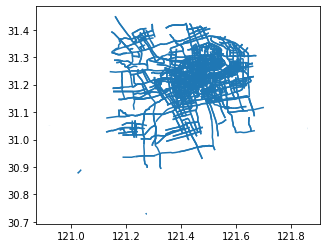

In [126]:
Roads.plot()

In [74]:
all_code = Roads['Lcode'].values.tolist()

for i in range(len(all_Roads)):
    s = all_Roads.loc[i]["Lcode"].split(',')
    lens = len(s)
    if lens == 2:
        for j in range(0,2):
            number = all_code.count(s[j])
#             print(number,i)
            if number == 1:
                tmp = all_Roads.loc[[i]]
#                 print(tmp)
                tmp2 = Roads[Roads['Lcode'] == s[j]]
                tmp2['Lcode'] = s[(j+1)%2]
                for m in tmp2['geometry'].values:
                    q = list(m.coords)
                for k in tmp['geometry'].values:
                    p = list(k.coords)
                ret = []
                for h in p:
                    if h not in q:
                        ret.append(h)
                try:
                    lines = LineString(ret)
                    tmp2['lenght'] = (tmp['lenght'].values - tmp2['lenght'].values)[0]
                    tmp2['geometry'] = lines
                    Roads = Roads.append(tmp2)
                    break;
                except:
                    break;
#                 tmp['geometry'] = tmp['geometry'] - tmp2['geometry']
    else:
        continue

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

In [75]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,-1434,"LINESTRING (121.62517 31.24854, 121.62305 31.2...",0.009444,川桥路
1,-1433,"LINESTRING (121.61598 31.24638, 121.61567 31.2...",0.018483,川桥路
2,5892,"LINESTRING (121.18341 31.24684, 121.18413 31.2...",0.031206,纪白公路
3,5891,"LINESTRING (121.13939 31.24717, 121.13973 31.2...",0.044168,纪白公路
4,-2443,"LINESTRING (121.31937 31.16127, 121.31917 31.1...",0.035816,沪渝高速
...,...,...,...,...
4301,-6159,"LINESTRING (121.66649 31.21636, 121.66627 31.2...",0.013064,高科东路
4302,-1353,"LINESTRING (121.53978 31.16507, 121.53921 31.1...",0.008597,高青路
4303,-4667,"LINESTRING (121.47839 31.19514, 121.47788 31.1...",0.004168,龙华东路
4304,2074,"LINESTRING (121.23338 31.02077, 121.23389 31.0...",0.087180,沪昆高速


In [18]:
all_code = Roads['Lcode'].values.tolist()

for i in range(len(all_Roads)):
    s = all_Roads.loc[i]["Lcode"].split(',')
    lens = len(s)
    if lens == 3:
        number = []
        print(s)
        for j in range(0,3):
            number.append(all_code.count(s[j]))
        print(number)
        if sum(number) == 2:
            ss = number.index(0)
            s1 = (ss+1)%3
            s2 = (ss+2)%3
            tmp = all_Roads.loc[[i]]
            print(tmp)
            tmp1 = Roads[Roads['Lcode'] == s[s1]]
            print(tmp1)
            tmp2 = Roads[Roads['Lcode'] == s[s2]]
            print(tmp2)
            
            for m in tmp2['geometry'].values:
                q = list(m.coords)
            for c in tmp1['geometry'].values:
                qq = list(m.coords)
            for k in tmp['geometry'].values:
                p = list(k.coords)
            ret = []
            for h in p:
                if h not in q:
                    if h not in qq:
                        ret.append(h)
            try:
                lines = LineString(ret)
                tmp2['lcode']=s[ss]
                tmp2['lenght'] = (tmp['lenght'].values - tmp2['lenght'].values - tmp3['lenght'].values)[0]
                tmp2['geometry'] = lines
                Roads = Roads.append(tmp2)
                print('success')
                break;
            except:
                break;
#                 tmp['geometry'] = tmp['geometry'] - tmp2['geometry']
    else:
        continue

['6220', '6221', '6222']
[0, 0, 1]
['5989', '5990', '5991']
[0, 0, 1]
['-5990', '-5989', '-5988']
[1, 1, 1]
['-5888', '-5887', '-5886']
[1, 1, 1]
['5774', '5775', '5776']
[1, 1, 1]
['-5892', '-5891', '-5890']
[1, 1, 1]
['5842', '5843', '5844']
[0, 0, 1]
['5782', '5783', '5784']
[0, 0, 1]
['-4589', '-4588', '-4587']
[0, 0, 0]
['6208', '6209', '6210']
[0, 0, 0]
['-6210', '-6209', '-6208']
[0, 0, 1]
['-5784', '-5783', '-5782']
[0, 0, 1]
['1852', '4893', '1848']
[1, 1, 1]
['-4893', '-1852', '-5194']
[1, 1, 1]
['5962', '5963', '5964']
[0, 0, 1]
['5938', '5939', '5940']
[1, 1, 1]
['5797', '5798', '5799']
[1, 1, 1]
['-5799', '-5798', '-5797']
[0, 0, 1]
['5934', '5935', '5936']
[0, 0, 1]
['5686', '5687', '5688']
[0, 0, 1]
['-5688', '-5687', '-5686']
[0, 0, 1]
['-5684', '-5683', '-5682']
[0, 0, 1]
['-2187', '-2188', '-2189']
[1, 0, 0]
['5906', '5907', '5908']
[1, 1, 1]
['5769', '5770', '5771']
[1, 1, 1]
['-5770', '-5769', '-5768']
[1, 1, 1]
['5846', '5847', '5848']
[1, 1, 1]
['4677', '4679', '4

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,-4910,"LINESTRING (121.57838 31.19302, 121.57867 31.1...",0.007858,罗山路
1,5892,"LINESTRING (121.18341 31.24684, 121.18413 31.2...",0.031206,纪白公路
2,5891,"LINESTRING (121.13939 31.24717, 121.13973 31.2...",0.044168,纪白公路
3,-2443,"LINESTRING (121.31937 31.16127, 121.31917 31.1...",0.035816,沪渝高速
4,-2124,"LINESTRING (121.32585 31.16946, 121.32567 31.1...",0.035729,沪青平公路
...,...,...,...,...
4303,2074,"LINESTRING (121.23338 31.02077, 121.23389 31.0...",0.087180,沪昆高速
4304,1163,"LINESTRING (121.50418 31.23258, 121.50397 31.2...",0.003516,陆家嘴环路
4305,5914,"LINESTRING (121.41917 31.08825, 121.43555 31.0...",0.021036,金都路
4306,65,"LINESTRING (121.45865 31.27950, 121.45831 31.2...",0.015983,平型关路


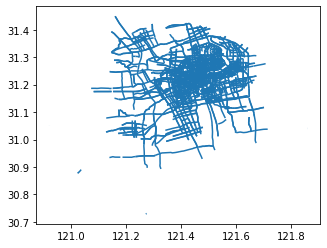

In [33]:
Roads.plot()

In [76]:
def save_to_file(data):
    datas = geopandas.GeoDataFrame(data)
    datas.to_file("Information_Of_Road",encoding='utf-8')

In [77]:
save_to_file(Roads)

In [138]:
Lcodes = ShangHai['Lcode']
Code_list = []

for i in range(len(Lcodes)):
    s = Lcodes[i].split(',')
    for j in s:
        Code_list.append(j)
set_code = set(Code_list)
print(len(set_code))

6016


In [23]:
Lcodes1 = Roads['Lcode']
Code_list1 = []
for i in range(len(Lcodes1)):
    s = Lcodes1[i].split(',')
    for j in s:
        Code_list1.append(j)
set_code2 = set(Code_list1)
print(len(set_code2))

4300


In [141]:
for i in set_code2:
    if i not in set_code:
        print('1')